In [126]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', None)


In [127]:
df = pd.read_csv('loan_final313.csv')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 30 columns):
id                      887379 non-null int64
year                    887379 non-null int64
issue_d                 887379 non-null object
final_d                 887379 non-null int64
emp_length_int          887379 non-null float64
home_ownership          887379 non-null object
home_ownership_cat      887379 non-null int64
income_category         887379 non-null object
annual_inc              887379 non-null int64
income_cat              887379 non-null int64
loan_amount             887379 non-null int64
term                    887379 non-null object
term_cat                887379 non-null int64
application_type        887379 non-null object
application_type_cat    887379 non-null int64
purpose                 887379 non-null object
purpose_cat             887379 non-null int64
interest_payments       887379 non-null object
interest_payment_cat    887379 non-null int64
loan_c

## Data Description
- LoanStatNew Description

- addr_state The state provided by the borrower in the loan application

- annual_inc The self-reported annual income provided by the borrower during registration.

- annualincjoint The combined self-reported annual income provided by the co-borrowers during registration

- application_type Indicates whether the loan is an individual application or a joint application with two co-borrowers

- collectionrecoveryfee post charge off collection fee

- collections12mthsexmed Number of collections in 12 months excluding medical collections

- delinq_2yrs The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

- desc Loan description provided by the borrower

- dti A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, - - - excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

- dti_joint A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, - excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income

- earliestcrline The month the borrower's earliest reported credit line was opened

- emp_length Employment length in years. Possible values are between 0 and 10 where 0 means less than one year

- and 10 means ten or more years.

- emp_title The job title supplied by the Borrower when applying for the loan.*

- ficorangehigh The upper boundary range the borrower’s FICO at loan origination belongs to.

- ficorangelow The lower boundary range the borrower’s FICO at loan origination belongs to.

- funded_amnt The total amount committed to that loan at that point in time.

- fundedamntinv The total amount committed by investors for that loan at that point in time.

- grade LC assigned loan grade

- home_ownership The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [129]:
df.head()

id  year     issue_d  final_d  emp_length_int home_ownership  \
0  1077501  2011  01/12/2011  1012015            10.0           RENT   
1  1077430  2011  01/12/2011  1042013             0.5           RENT   
2  1077175  2011  01/12/2011  1062014            10.0           RENT   
3  1076863  2011  01/12/2011  1012015            10.0           RENT   
4  1075358  2011  01/12/2011  1012016             1.0           RENT   

   home_ownership_cat income_category  annual_inc  income_cat  loan_amount  \
0                   1             Low       24000           1         5000   
1                   1             Low       30000           1         2500   
2                   1             Low       12252           1         2400   
3                   1             Low       49200           1        10000   
4                   1             Low       80000           1         3000   

         term  term_cat application_type  application_type_cat  \
0   36 months         1       INDIVIDUAL                     1   
1   60 months         2       INDIVIDUAL                     1   
2   36 months         1       INDIVIDUAL                     1   
3   36 months         1       INDIVIDUAL                     1   
4   60 months         2       INDIVIDUAL                     1   

          purpose  purpose_cat interest_payments  interest_payment_cat  \
0     credit_card            1               Low                     1   
1             car            2              High                     2   
2  small_business            3              High                     2   
3           other            4              High                     2   
4           other            4               Low                     1   

  loan_condition  loan_condition_cat  interest_rate grade  grade_cat    dti  \
0      Good Loan                   0          10.65     B          2  27.65   
1       Bad Loan                   1          15.27     C          3   1.00   
2      Good Loan                   0          15.96     C          3   8.72   
3      Good Loan                   0          13.49     C          3  20.00   
4      Good Loan                   0          12.69     B          2  17.94   

    total_pymnt  total_rec_prncp  recoveries  installment    region  
0   5861.071414          5000.00        0.00       162.87   munster  
1   1008.710000           456.46      117.08        59.83  leinster  
2   3003.653644          2400.00        0.00        84.33  cannught  
3  12226.302210         10000.00        0.00       339.31    ulster  
4   3242.170000          2233.10        0.00        67.79    ulster

In [130]:
df['loan_condition']

0         Good Loan
1          Bad Loan
2         Good Loan
3         Good Loan
4         Good Loan
            ...    
887374    Good Loan
887375    Good Loan
887376    Good Loan
887377    Good Loan
887378    Good Loan
Name: loan_condition, Length: 887379, dtype: object

In [131]:
df.describe()

id           year       final_d  emp_length_int  \
count  8.873790e+05  887379.000000  8.873790e+05   887379.000000   
mean   3.246513e+07    2014.021761  1.047089e+06        6.050564   
std    2.282734e+07       1.261741  4.555149e+04        3.507405   
min    5.473400e+04    2007.000000  1.012008e+06        0.500000   
25%    9.206643e+06    2013.000000  1.012016e+06        3.000000   
50%    3.443327e+07    2014.000000  1.012016e+06        6.050000   
75%    5.490814e+07    2015.000000  1.092015e+06       10.000000   
max    6.861706e+07    2015.000000  1.122015e+06       10.000000   

       home_ownership_cat    annual_inc     income_cat    loan_amount  \
count       887379.000000  8.873790e+05  887379.000000  887379.000000   
mean             2.099130  7.502759e+04       1.196702   14755.264605   
std              0.944839  6.469815e+04       0.442542    8435.455601   
min              1.000000  0.000000e+00       1.000000     500.000000   
25%              1.000000  4.500000e+04       1.000000    8000.000000   
50%              3.000000  6.500000e+04       1.000000   13000.000000   
75%              3.000000  9.000000e+04       1.000000   20000.000000   
max              6.000000  9.500000e+06       3.000000   35000.000000   

            term_cat  application_type_cat    purpose_cat  \
count  887379.000000         887379.000000  887379.000000   
mean        1.300045              1.000576       4.874621   
std         0.458278              0.023990       2.381156   
min         1.000000              1.000000       1.000000   
25%         1.000000              1.000000       3.000000   
50%         1.000000              1.000000       6.000000   
75%         2.000000              1.000000       6.000000   
max         2.000000              2.000000      14.000000   

       interest_payment_cat  loan_condition_cat  interest_rate      grade_cat  \
count         887379.000000       887379.000000  887379.000000  887379.000000   
mean               1.475629            0.075987      13.246740       2.798403   
std                0.499406            0.264977       4.381867       1.312599   
min                1.000000            0.000000       5.320000       1.000000   
25%                1.000000            0.000000       9.990000       2.000000   
50%                1.000000            0.000000      12.990000       3.000000   
75%                2.000000            0.000000      16.200000       4.000000   
max                2.000000            1.000000      28.990000       7.000000   

                 dti    total_pymnt  total_rec_prncp     recoveries  \
count  887379.000000  887379.000000    887379.000000  887379.000000   
mean       18.157039    7558.826684      5757.706424      45.919243   
std        17.190626    7871.243336      6625.441046     409.693874   
min         0.000000       0.000000         0.000000       0.000000   
25%        11.910000    1914.590000      1200.570000       0.000000   
50%        17.650000    4894.999117      3215.320000       0.000000   
75%        23.950000   10616.814230      8000.000000       0.000000   
max      9999.000000   57777.579870     35000.030000   33520.270000   

         installment  
count  887379.000000  
mean      436.717127  
std       244.186593  
min        15.670000  
25%       260.705000  
50%       382.550000  
75%       572.600000  
max      1445.460000

In [132]:
dfFeat = []
for i in df.columns:
    dfFeat.append([i, df[i].dtypes, df[i].isna().sum(), round((df[i].isna().sum())/(len(df))*100,2), df[i].nunique(),
                  df[i].sample(2).values])
    
# tsaFeat
pd.DataFrame(dfFeat, columns= ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

dataFeatures dataType  null  nullPct  unique  \
0                     id    int64     0      0.0  887379   
1                   year    int64     0      0.0       9   
2                issue_d   object     0      0.0     103   
3                final_d    int64     0      0.0      98   
4         emp_length_int  float64     0      0.0      12   
5         home_ownership   object     0      0.0       6   
6     home_ownership_cat    int64     0      0.0       6   
7        income_category   object     0      0.0       3   
8             annual_inc    int64     0      0.0   45784   
9             income_cat    int64     0      0.0       3   
10           loan_amount    int64     0      0.0    1372   
11                  term   object     0      0.0       2   
12              term_cat    int64     0      0.0       2   
13      application_type   object     0      0.0       2   
14  application_type_cat    int64     0      0.0       2   
15               purpose   object     0      0.0      14   
16           purpose_cat    int64     0      0.0      14   
17     interest_payments   object     0      0.0       2   
18  interest_payment_cat    int64     0      0.0       2   
19        loan_condition   object     0      0.0       2   
20    loan_condition_cat    int64     0      0.0       2   
21         interest_rate  float64     0      0.0     542   
22                 grade   object     0      0.0       7   
23             grade_cat    int64     0      0.0       7   
24                   dti  float64     0      0.0    4086   
25           total_pymnt  float64     0      0.0  505628   
26       total_rec_prncp  float64     0      0.0  260227   
27            recoveries  float64     0      0.0   23055   
28           installment  float64     0      0.0   68711   
29                region   object     0      0.0       5   

                         uniqueSample  
0                 [1298928, 38494262]  
1                        [2015, 2010]  
2            [01/04/2015, 01/10/2014]  
3                  [1012016, 1012016]  
4                          [5.0, 1.0]  
5                     [MORTGAGE, OWN]  
6                              [2, 3]  
7                       [Low, Medium]  
8                      [31000, 62500]  
9                              [2, 1]  
10                      [7000, 10000]  
11           [ 36 months,  36 months]  
12                             [1, 1]  
13           [INDIVIDUAL, INDIVIDUAL]  
14                             [1, 1]  
15  [debt_consolidation, credit_card]  
16                             [6, 1]  
17                        [Low, High]  
18                             [1, 2]  
19             [Good Loan, Good Loan]  
20                             [0, 0]  
21                     [18.25, 14.65]  
22                             [B, C]  
23                             [2, 2]  
24                     [13.48, 10.31]  
25                 [8921.43, 9369.96]  
26                   [22250.0, 364.1]  
27                      [0.0, 265.89]  
28                   [392.99, 343.13]  
29                 [cannught, ulster]

- We dont have missing value

>### Convert Object to datetime

In [133]:
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 30 columns):
id                      887379 non-null int64
year                    887379 non-null int64
issue_d                 887379 non-null datetime64[ns]
final_d                 887379 non-null int64
emp_length_int          887379 non-null float64
home_ownership          887379 non-null object
home_ownership_cat      887379 non-null int64
income_category         887379 non-null object
annual_inc              887379 non-null int64
income_cat              887379 non-null int64
loan_amount             887379 non-null int64
term                    887379 non-null object
term_cat                887379 non-null int64
application_type        887379 non-null object
application_type_cat    887379 non-null int64
purpose                 887379 non-null object
purpose_cat             887379 non-null int64
interest_payments       887379 non-null object
interest_payment_cat    887379 non-null int6

Text(0.5, 1.0, 'loan_amount')

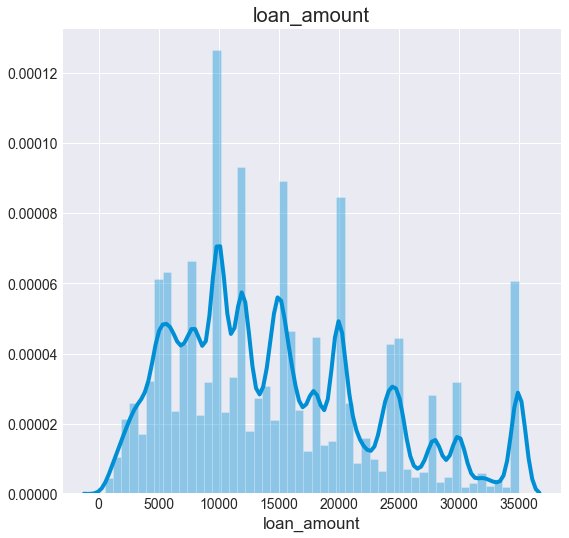

In [135]:
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
sns.distplot(df['loan_amount'])
plt.title('loan_amount')

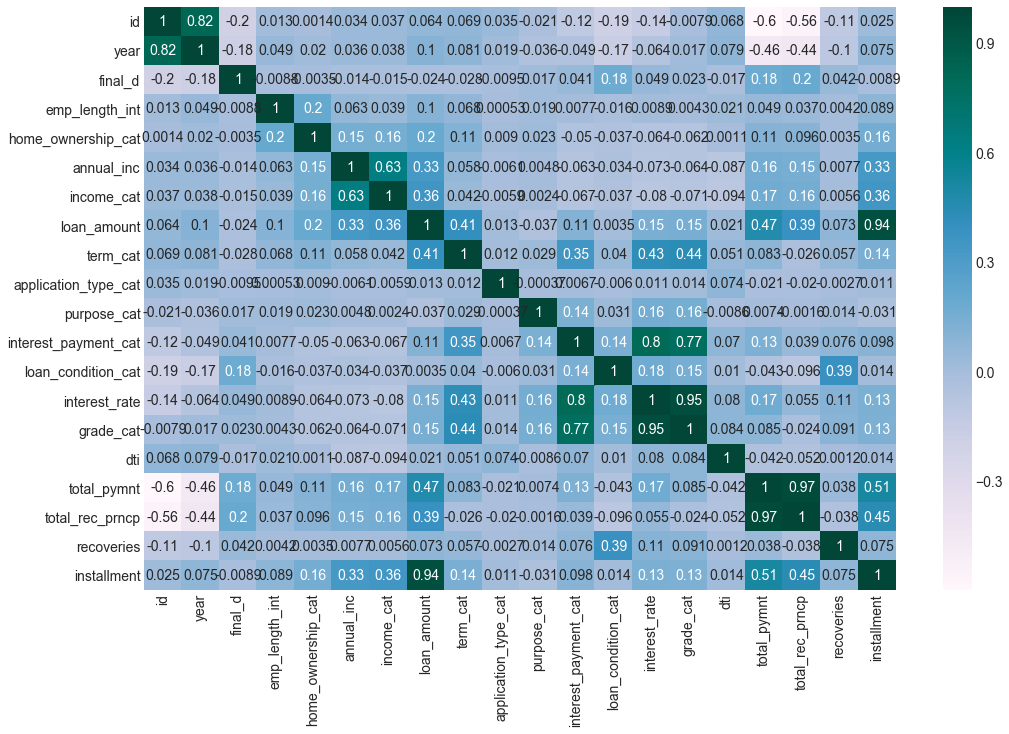

In [222]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap='PuBuGn')

>### Data visualization

In [137]:
df.head(1)

id  year    issue_d  final_d  emp_length_int home_ownership  \
0  1077501  2011 2011-01-12  1012015            10.0           RENT   

   home_ownership_cat income_category  annual_inc  income_cat  loan_amount  \
0                   1             Low       24000           1         5000   

         term  term_cat application_type  application_type_cat      purpose  \
0   36 months         1       INDIVIDUAL                     1  credit_card   

   purpose_cat interest_payments  interest_payment_cat loan_condition  \
0            1               Low                     1      Good Loan   

   loan_condition_cat  interest_rate grade  grade_cat    dti  total_pymnt  \
0                   0          10.65     B          2  27.65  5861.071414   

   total_rec_prncp  recoveries  installment   region  
0           5000.0         0.0       162.87  munster

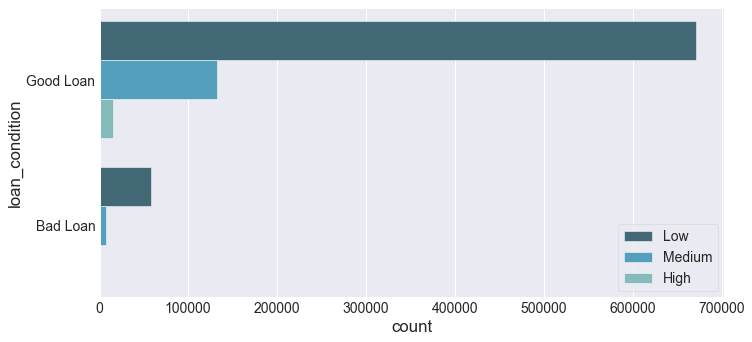

In [138]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='loan_condition',hue='income_category', palette='GnBu_d')
plt.legend(loc='lower right')
plt.show()

In [139]:
loanbyincome =df.groupby('income_category')['loan_condition_cat'].mean()
loanbyincome

income_category
High      0.048135
Low       0.080679
Medium    0.055016
Name: loan_condition_cat, dtype: float64

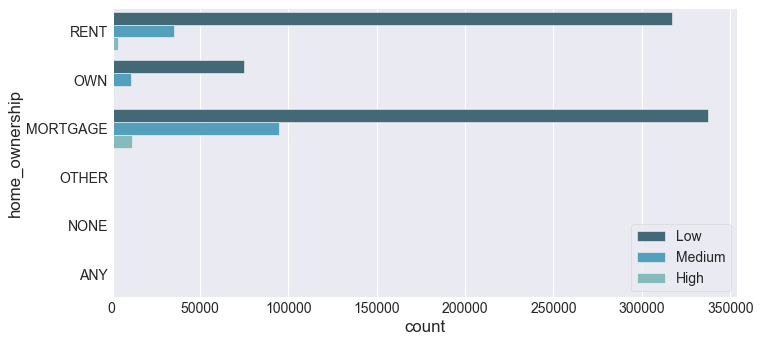

In [140]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='home_ownership',hue='income_category', palette='GnBu_d')
plt.legend(loc='lower right')
plt.show()

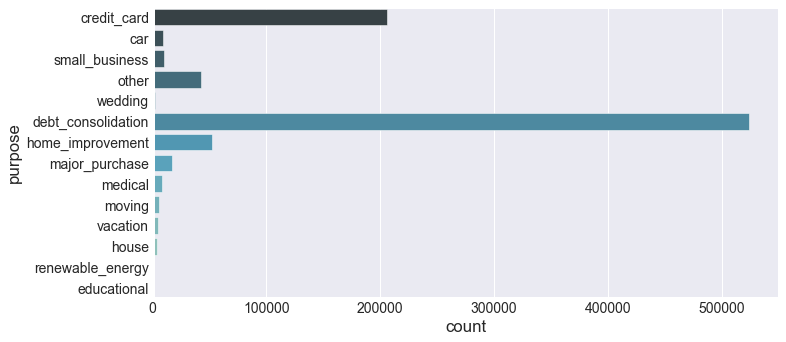

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64


In [141]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,y='purpose', palette='GnBu_d')
plt.show()
print(df['purpose'].value_counts(ascending=False))

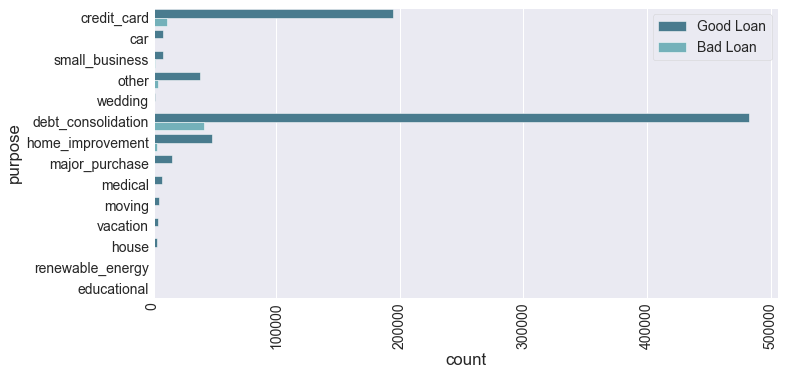

In [142]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='purpose',hue='loan_condition', palette='GnBu_d')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [143]:
loanbypurpose =df.groupby('purpose')['loan_condition_cat'].mean()
loanbypurpose

purpose
car                   0.067246
credit_card           0.057013
debt_consolidation    0.079372
educational           0.208038
home_improvement      0.068552
house                 0.112490
major_purchase        0.074897
medical               0.094145
moving                0.112117
other                 0.097053
renewable_energy      0.125217
small_business        0.171630
vacation              0.084882
wedding               0.123136
Name: loan_condition_cat, dtype: float64

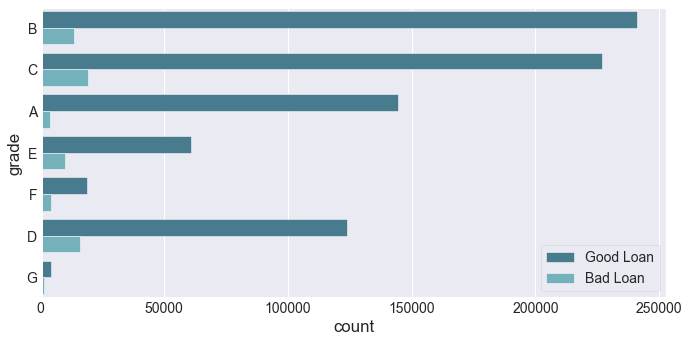

In [144]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='grade',hue='loan_condition', palette='GnBu_d')
plt.legend()
plt.show()

In [145]:
loanbygrade =df.groupby('grade')['loan_condition_cat'].mean()
loanbygrade

grade
A    0.024716
B    0.052865
C    0.077499
D    0.113650
E    0.137826
F    0.190185
G    0.231190
Name: loan_condition_cat, dtype: float64

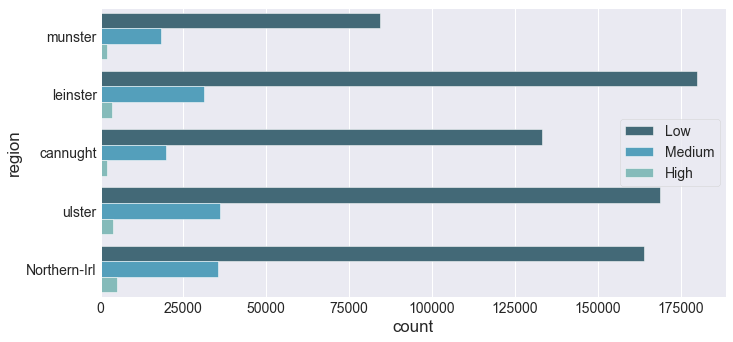

In [146]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='region',hue='income_category', palette='GnBu_d')
plt.legend()
plt.show()

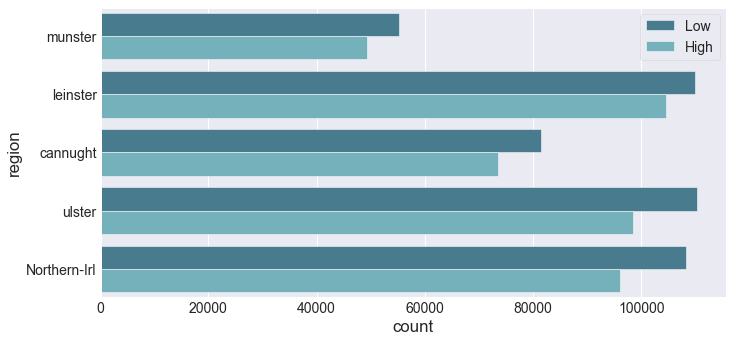

In [147]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='region',hue='interest_payments', palette='GnBu_d')
plt.legend()
plt.show()

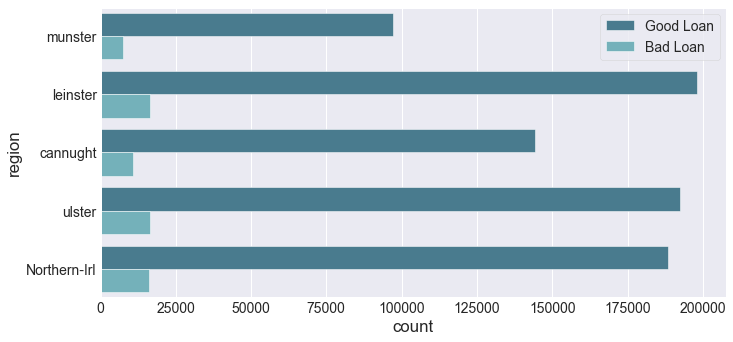

In [148]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='region',hue='loan_condition', palette='GnBu_d')
plt.legend()
plt.show()

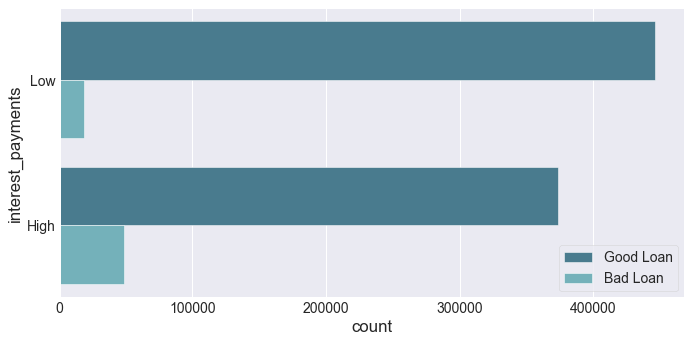

In [149]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='interest_payments',hue='loan_condition', palette='GnBu_d')
plt.legend()
plt.show()

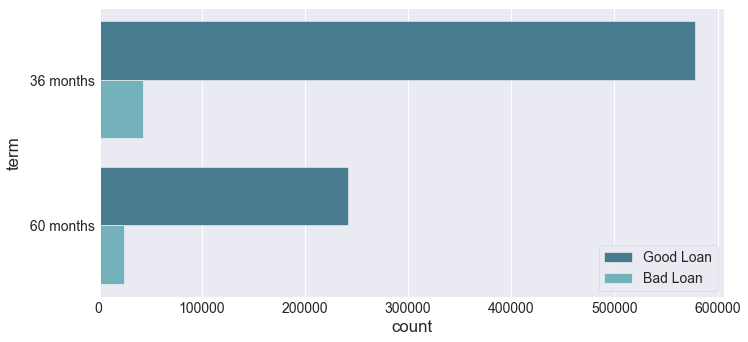

In [150]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='term',hue='loan_condition', palette='GnBu_d')
plt.legend()
plt.show()

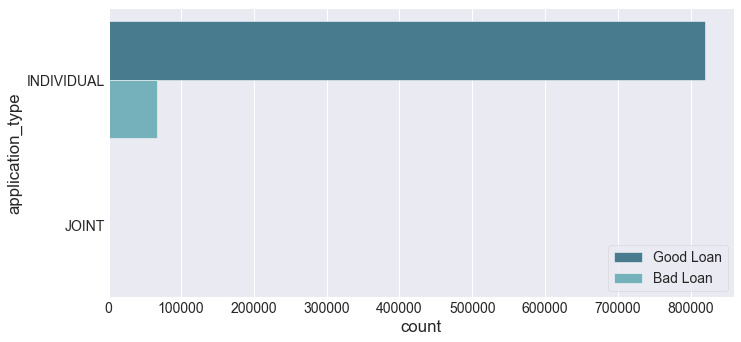

In [151]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='application_type',hue='loan_condition', palette='GnBu_d')
plt.legend(loc='lower right')
plt.show()

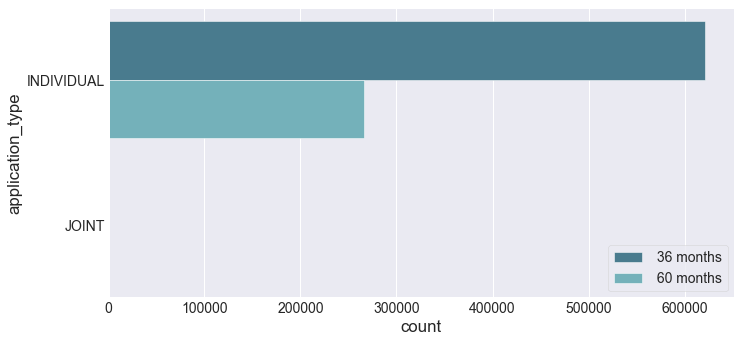

In [152]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='application_type',hue='term', palette='GnBu_d')
plt.legend(loc='lower right')
plt.show()

In [153]:
loanbyincome =df.groupby('application_type')['term_cat'].mean()
loanbyincome

application_type
INDIVIDUAL    1.299912
JOINT         1.532290
Name: term_cat, dtype: float64

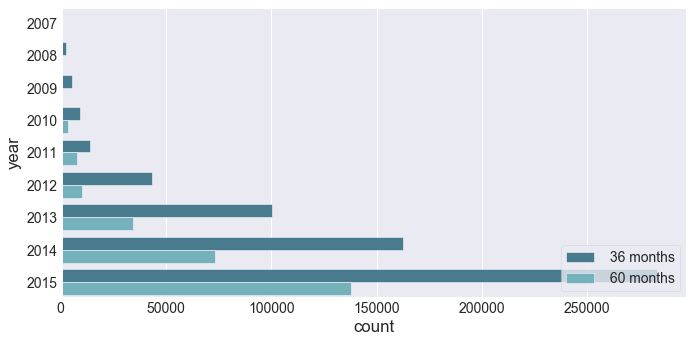

In [154]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='year',hue='term', palette='GnBu_d')
plt.legend(loc='lower right')
plt.show()

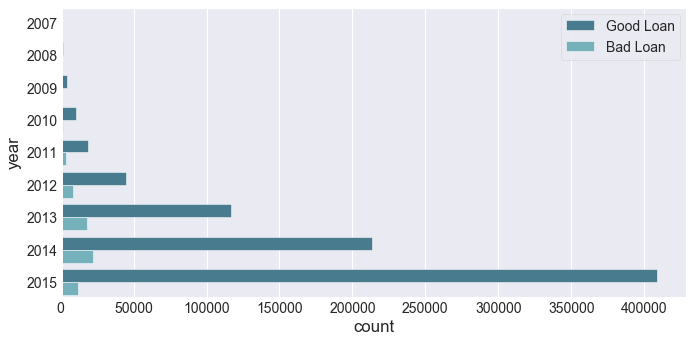

In [155]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='year',hue='loan_condition', palette='GnBu_d')
plt.legend(loc='upper right')
plt.show()

In [156]:
df['interest_rate'].describe()

count    887379.000000
mean         13.246740
std           4.381867
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: interest_rate, dtype: float64

In [157]:
df[df['interest_rate'] == 28.990000]['loan_condition'].value_counts()

Good Loan    92
Bad Loan     20
Name: loan_condition, dtype: int64

In [158]:
df[df['interest_rate'] == 5.320000]['loan_condition'].value_counts()

Good Loan    9630
Bad Loan       21
Name: loan_condition, dtype: int64

In [159]:
df['term'].value_counts()

 36 months    621125
 60 months    266254
Name: term, dtype: int64

In [160]:
df[df['interest_rate'] == 5.320000]['term'].value_counts()

 36 months    9651
Name: term, dtype: int64

In [161]:
df[(df['interest_rate'] == 5.320000) & (df['term'] == ' 36 months')].head()

id  year    issue_d  final_d  emp_length_int home_ownership  \
466286  68547583  2015 2015-01-12  1012016            0.50       MORTGAGE   
466294  68377020  2015 2015-01-12  1012016            6.05           RENT   
466314  68596180  2015 2015-01-12  1012016            9.00            OWN   
466329  68587652  2015 2015-01-12  1012016            1.00       MORTGAGE   
466330  68526883  2015 2015-01-12  1012016           10.00       MORTGAGE   

        home_ownership_cat income_category  annual_inc  income_cat  \
466286                   3             Low      100000           1   
466294                   1             Low       80000           1   
466314                   2             Low       65000           1   
466329                   3          Medium      150000           2   
466330                   3             Low       44000           1   

        loan_amount        term  term_cat application_type  \
466286         8650   36 months         1       INDIVIDUAL   
466294        15000   36 months         1       INDIVIDUAL   
466314        20000   36 months         1       INDIVIDUAL   
466329        25000   36 months         1       INDIVIDUAL   
466330        15000   36 months         1       INDIVIDUAL   

        application_type_cat             purpose  purpose_cat  \
466286                     1         credit_card            1   
466294                     1  debt_consolidation            6   
466314                     1  debt_consolidation            6   
466329                     1         credit_card            1   
466330                     1    home_improvement            7   

       interest_payments  interest_payment_cat loan_condition  \
466286               Low                     1      Good Loan   
466294               Low                     1      Good Loan   
466314               Low                     1      Good Loan   
466329               Low                     1      Good Loan   
466330               Low                     1      Good Loan   

        loan_condition_cat  interest_rate grade  grade_cat    dti  \
466286                   0           5.32     A          1   7.28   
466294                   0           5.32     A          1  20.18   
466314                   0           5.32     A          1  18.83   
466329                   0           5.32     A          1   9.54   
466330                   0           5.32     A          1  15.34   

        total_pymnt  total_rec_prncp  recoveries  installment        region  
466286         0.00             0.00         0.0       260.50      cannught  
466294         0.00             0.00         0.0       451.73      leinster  
466314         0.00             0.00         0.0       602.30  Northern-Irl  
466329       682.67           642.03         0.0       752.87  Northern-Irl  
466330         0.00             0.00         0.0       451.73      leinster

In [162]:
df[df['interest_rate'] == 28.990000]['term'].value_counts()

 60 months    108
 36 months      4
Name: term, dtype: int64

In [163]:
df[df['application_type'] == 'JOINT'].head()

id  year    issue_d  final_d  emp_length_int home_ownership  \
466289  68341763  2015 2015-01-12  1012016            10.0       MORTGAGE   
466419  68341663  2015 2015-01-12  1012016             9.0       MORTGAGE   
466741  68340637  2015 2015-01-12  1012016             1.0       MORTGAGE   
466850  68340478  2015 2015-01-12  1012016             1.0       MORTGAGE   
466914  68586213  2015 2015-01-12  1012016             1.0           RENT   

        home_ownership_cat income_category  annual_inc  income_cat  \
466289                   3             Low       63000           1   
466419                   3             Low       75000           1   
466741                   3             Low       65000           1   
466850                   3             Low       96000           1   
466914                   1             Low       29524           1   

        loan_amount        term  term_cat application_type  \
466289        20000   60 months         2            JOINT   
466419        20000   60 months         2            JOINT   
466741        15000   36 months         1            JOINT   
466850        24000   60 months         2            JOINT   
466914         8750   36 months         1            JOINT   

        application_type_cat             purpose  purpose_cat  \
466289                     2    home_improvement            7   
466419                     2  debt_consolidation            6   
466741                     2  debt_consolidation            6   
466850                     2         credit_card            1   
466914                     2  debt_consolidation            6   

       interest_payments  interest_payment_cat loan_condition  \
466289               Low                     1      Good Loan   
466419              High                     2      Good Loan   
466741               Low                     1      Good Loan   
466850              High                     2      Good Loan   
466914              High                     2      Good Loan   

        loan_condition_cat  interest_rate grade  grade_cat    dti  \
466289                   0          10.78     B          2  10.78   
466419                   0          13.44     C          3  20.67   
466741                   0          11.99     C          3  17.56   
466850                   0          13.44     C          3  22.70   
466914                   0          18.99     E          5  46.71   

        total_pymnt  total_rec_prncp  recoveries  installment    region  
466289         0.00             0.00         0.0       432.66  cannught  
466419         0.00             0.00         0.0       459.58    ulster  
466741         0.00             0.00         0.0       498.15    ulster  
466850         0.00             0.00         0.0       551.50  cannught  
466914       237.61           182.22         0.0       320.70  cannught

In [164]:
len(df['recoveries'].value_counts())

23055

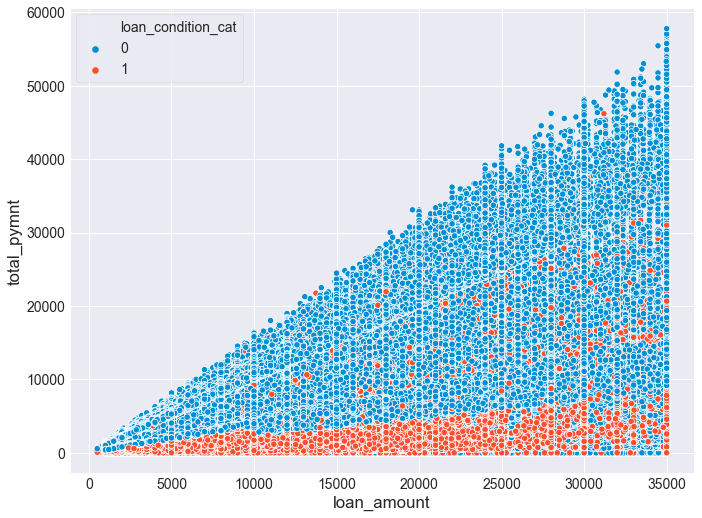

In [165]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='loan_amount', y='total_pymnt', hue='loan_condition_cat', s= 40)
plt.show()

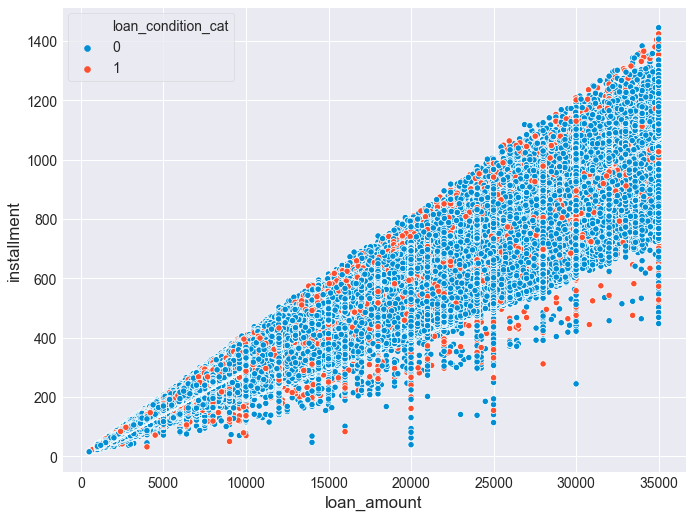

In [221]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='loan_amount', y='installment', hue='loan_condition_cat', s= 40)
plt.show()

>### Bad Loans

In [166]:
bad_loan = df[df['loan_condition']=='Bad Loan']
bad_loan.shape

(67429, 30)

In [167]:
bad_loan.describe(include='O')

home_ownership income_category        term application_type  \
count           67429           67429       67429            67429   
unique              5               3           2                2   
top              RENT             Low   36 months       INDIVIDUAL   
freq            31391           58865       42931            67424   

                   purpose interest_payments loan_condition  grade    region  
count                67429             67429          67429  67429     67429  
unique                  14                 2              1      7         5  
top     debt_consolidation              High       Bad Loan      C  leinster  
freq                 41608             48572          67429  19054     16679

In [168]:
bad_loan.describe()

id          year       final_d  emp_length_int  \
count  6.742900e+04  67429.000000  6.742900e+04    67429.000000   
mean   1.728569e+07   2013.295244  1.075423e+06        5.857064   
std    1.719404e+07      1.399202  3.635313e+04        3.468839   
min    5.641300e+04   2007.000000  1.012008e+06        0.500000   
25%    3.351082e+06   2013.000000  1.042015e+06        3.000000   
50%    1.016219e+07   2014.000000  1.082014e+06        6.000000   
75%    2.873380e+07   2014.000000  1.112012e+06       10.000000   
max    6.799908e+07   2015.000000  1.122015e+06       10.000000   

       home_ownership_cat    annual_inc    income_cat   loan_amount  \
count        67429.000000  6.742900e+04  67429.000000  67429.000000   
mean             1.976390  6.732467e+04      1.138991  14858.564935   
std              0.953293  6.481291e+04      0.378999   8471.158706   
min              1.000000  2.000000e+03      1.000000    500.000000   
25%              1.000000  4.200000e+04      1.000000   8325.000000   
50%              2.000000  5.800000e+04      1.000000  13175.000000   
75%              3.000000  8.000000e+04      1.000000  20000.000000   
max              5.000000  8.900060e+06      3.000000  35000.000000   

           term_cat  application_type_cat   purpose_cat  interest_payment_cat  \
count  67429.000000          67429.000000  67429.000000          67429.000000   
mean       1.363315              1.000074      5.133667              1.720343   
std        0.480958              0.008611      2.264186              0.448834   
min        1.000000              1.000000      1.000000              1.000000   
25%        1.000000              1.000000      4.000000              1.000000   
50%        1.000000              1.000000      6.000000              2.000000   
75%        2.000000              1.000000      6.000000              2.000000   
max        2.000000              2.000000     14.000000              2.000000   

       loan_condition_cat  interest_rate     grade_cat           dti  \
count             67429.0   67429.000000  67429.000000  67429.000000   
mean                  1.0      15.927657      3.486319     18.754182   
std                   0.0       4.313284      1.371055      8.132318   
min                   1.0       5.320000      1.000000      0.000000   
25%                   1.0      12.990000      2.000000     12.770000   
50%                   1.0      15.610000      3.000000     18.630000   
75%                   1.0      18.750000      4.000000     24.540000   
max                   1.0      28.990000      7.000000     59.260000   

        total_pymnt  total_rec_prncp    recoveries   installment  
count  67429.000000     67429.000000  67429.000000  67429.000000  
mean    6391.875095      3539.935127    604.306341    448.744260  
std     5651.120607      3584.840877   1368.033414    249.551787  
min        0.000000         0.000000      0.000000     15.910000  
25%     2424.120000      1147.660000      0.000000    270.480000  
50%     4781.850000      2430.530000      0.000000    396.420000  
75%     8640.050000      4702.060000    612.240000    581.400000  
max    52943.000000     35000.000000  33520.270000   1424.570000

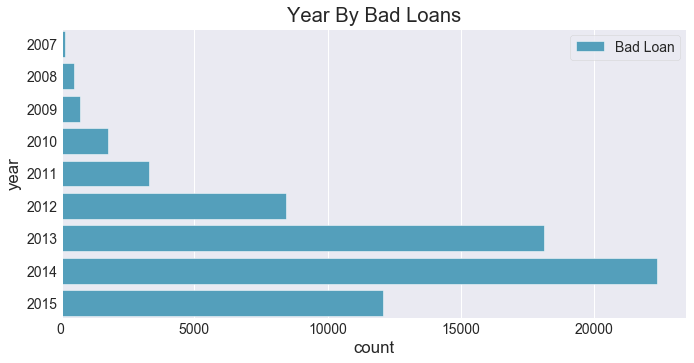

In [169]:
plt.figure(figsize=(10,5))
sns.countplot(data=bad_loan, y='year',hue='loan_condition', palette='GnBu_d')
plt.legend(loc='upper right')
plt.title('Year By Bad Loans')
plt.show()

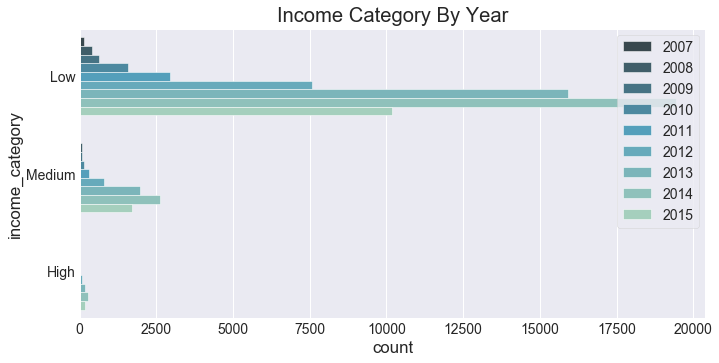

In [170]:
plt.figure(figsize=(10,5))
sns.countplot(data=bad_loan, y='income_category',hue='year', palette='GnBu_d')
plt.legend(loc='upper right')
plt.title('Income Category By Year')
plt.show()

In [171]:
df[df['income_category'] == 'Low']['year'].value_counts()

2015    340988
2014    193955
2013    112510
2012     45754
2011     18508
2010     10773
2009      4508
2008      2097
2007       523
Name: year, dtype: int64

In [172]:
df[df['income_category'] == 'Medium']['year'].value_counts()

2015    71120
2014    37280
2013    20236
2012     6900
2011     2895
2010     1564
2009      664
2008      258
2007       60
Name: year, dtype: int64

In [173]:
df[df['income_category'] == 'High']['year'].value_counts()

2015    8986
2014    4393
2013    2009
2012     713
2011     318
2010     200
2009     109
2008      38
2007      20
Name: year, dtype: int64

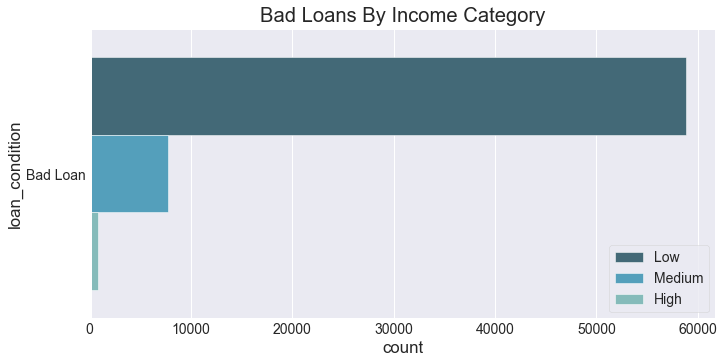

In [174]:
plt.figure(figsize=(10,5))
sns.countplot(data=bad_loan, y='loan_condition',hue='income_category', palette='GnBu_d')
plt.legend(loc='lower right')
plt.title('Bad Loans By Income Category')
plt.show()

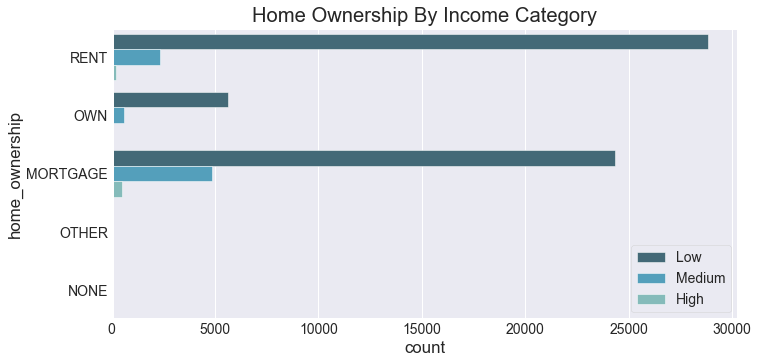

In [175]:
plt.figure(figsize=(10,5))
sns.countplot(data=bad_loan, y='home_ownership',hue='income_category', palette='GnBu_d')
plt.legend(loc='lower right')
plt.title('Home Ownership By Income Category')
plt.show()

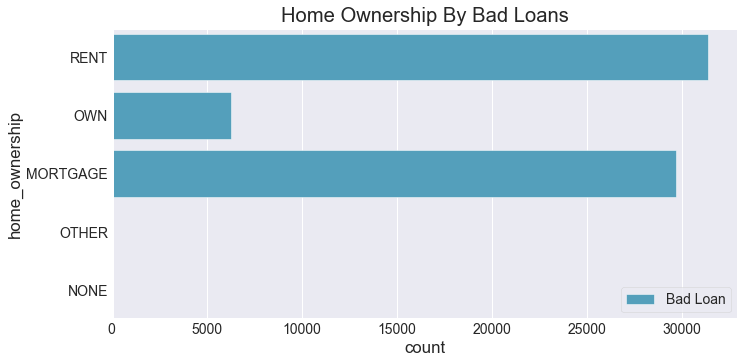

In [176]:
plt.figure(figsize=(10,5))
sns.countplot(data=bad_loan, y='home_ownership',hue='loan_condition', palette='GnBu_d')
plt.legend(loc='lower right')
plt.title('Home Ownership By Bad Loans')
plt.show()

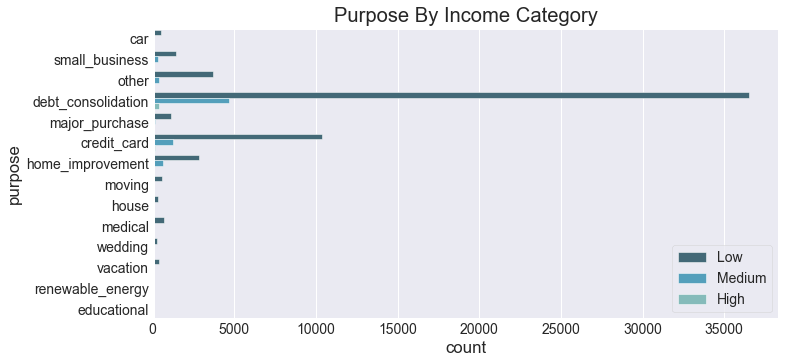

In [177]:
plt.figure(figsize=(10,5))
sns.countplot(data=bad_loan, y='purpose',hue='income_category', palette='GnBu_d')
plt.legend(loc='lower right')
plt.title('Purpose By Income Category')
plt.show()

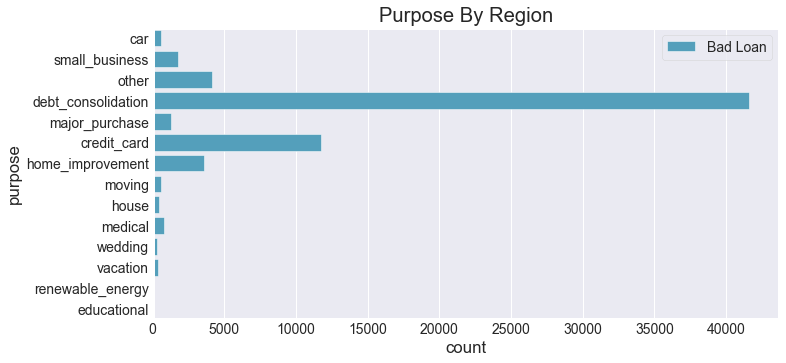

In [178]:
plt.figure(figsize=(10,5))
sns.countplot(data=bad_loan, y='purpose',hue='loan_condition', palette='GnBu_d')
plt.legend(loc='upper right')
plt.title('Purpose By Region')
plt.show()

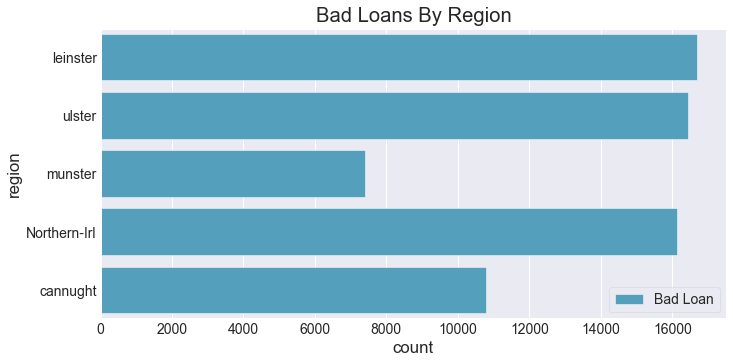

In [179]:
plt.figure(figsize=(10,5))
sns.countplot(data=bad_loan, y='region',hue='loan_condition', palette='GnBu_d')
plt.legend(loc='lower right')
plt.title('Bad Loans By Region')
plt.show()

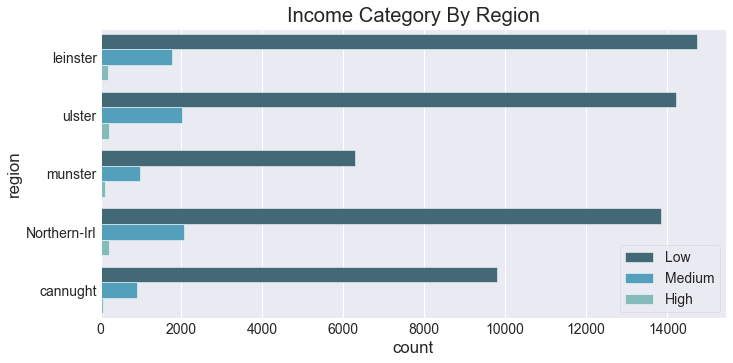

In [180]:
plt.figure(figsize=(10,5))
sns.countplot(data=bad_loan, y='region',hue='income_category', palette='GnBu_d')
plt.legend(loc='lower right')
plt.title('Income Category By Region')
plt.show()

In [181]:
bad_loan[bad_loan['income_category'] == 'Low']['region'].value_counts()

leinster        14727
ulster          14203
Northern-Irl    13854
cannught         9791
munster          6290
Name: region, dtype: int64

In [182]:
bad_loan[bad_loan['income_category'] == 'Medium']['region'].value_counts()

Northern-Irl    2067
ulster          2022
leinster        1768
munster          992
cannught         907
Name: region, dtype: int64

In [183]:
bad_loan[bad_loan['income_category'] == 'High']['region'].value_counts()

Northern-Irl    212
ulster          207
leinster        184
munster         125
cannught         80
Name: region, dtype: int64

In [184]:
bad_loan[(bad_loan['region'] == 'cannught') & (bad_loan['income_category'] == 'High')].head()

id  year    issue_d  final_d  emp_length_int home_ownership  \
5730   980494  2011 2011-01-10  1112012             1.0           RENT   
5794   979881  2011 2011-01-10  1092013             2.0       MORTGAGE   
10650  830027  2011 2011-01-07  1102015             2.0       MORTGAGE   
16726  728605  2011 2011-01-04  1052013             5.0       MORTGAGE   
17935  708974  2011 2011-01-03  1122013             7.0       MORTGAGE   

       home_ownership_cat income_category  annual_inc  income_cat  \
5730                    1            High      215000           3   
5794                    3            High      250000           3   
10650                   3            High     1250000           3   
16726                   3            High      214992           3   
17935                   3            High      300000           3   

       loan_amount        term  term_cat application_type  \
5730         16000   60 months         2       INDIVIDUAL   
5794         20000   60 months         2       INDIVIDUAL   
10650        15775   60 months         2       INDIVIDUAL   
16726        30000   60 months         2       INDIVIDUAL   
17935        35000   60 months         2       INDIVIDUAL   

       application_type_cat             purpose  purpose_cat  \
5730                      1               other            4   
5794                      1      small_business            3   
10650                     1  debt_consolidation            6   
16726                     1  debt_consolidation            6   
17935                     1    home_improvement            7   

      interest_payments  interest_payment_cat loan_condition  \
5730               High                     2       Bad Loan   
5794               High                     2       Bad Loan   
10650               Low                     1       Bad Loan   
16726              High                     2       Bad Loan   
17935               Low                     1       Bad Loan   

       loan_condition_cat  interest_rate grade  grade_cat    dti  total_pymnt  \
5730                    1          19.91     E          5  13.99      5517.16   
5794                    1          16.77     D          4   9.22     14774.67   
10650                   1          12.99     C          3  21.81     18281.20   
16726                   1          14.17     C          3   5.74     16114.14   
17935                   1          12.68     C          3  18.17     24508.49   

       total_rec_prncp  recoveries  installment    region  
5730           2264.11        0.00       423.11  cannught  
5794           5758.47     3427.33       494.59  cannught  
10650         12799.70        0.00       358.85  cannught  
16726          9075.70        0.00       700.70  cannught  
17935         15308.77        0.00       790.64  cannught

In [185]:
bad_loan[(bad_loan['region'] == 'cannught') & (bad_loan['income_category'] == 'High')].describe(include='O')

home_ownership income_category        term application_type  \
count              80              80          80               80   
unique              3               1           2                1   
top          MORTGAGE            High   36 months       INDIVIDUAL   
freq               52              80          43               80   

                   purpose interest_payments loan_condition grade    region  
count                   80                80             80    80        80  
unique                   7                 2              1     7         1  
top     debt_consolidation              High       Bad Loan     C  cannught  
freq                    40                61             80    24        80

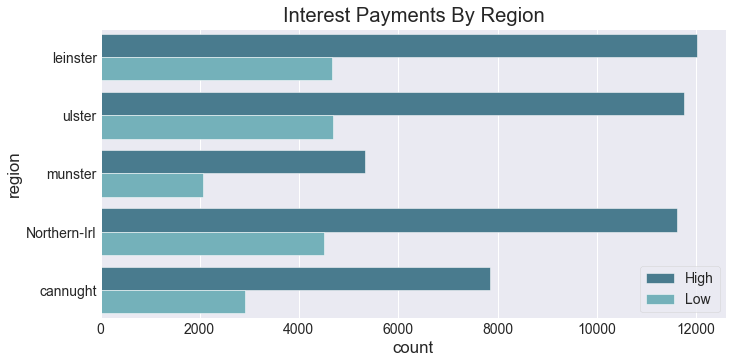

In [186]:
plt.figure(figsize=(10,5))
sns.countplot(data=bad_loan, y='region',hue='interest_payments', palette='GnBu_d')
plt.legend(loc='lower right')
plt.title('Interest Payments By Region')
plt.show()

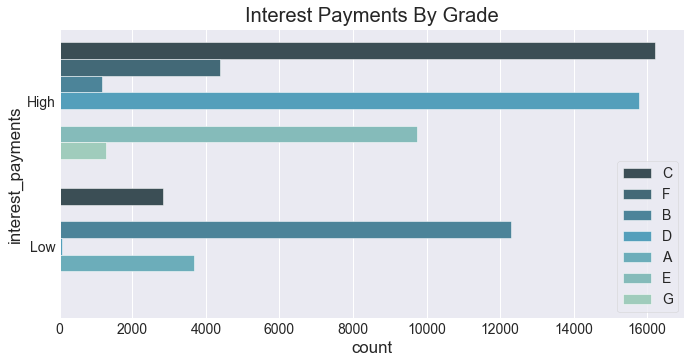

In [187]:
plt.figure(figsize=(10,5))
sns.countplot(data=bad_loan, y='interest_payments',hue='grade', palette='GnBu_d')
plt.legend(loc='lower right')
plt.title('Interest Payments By Grade')
plt.show()

In [188]:
df[df['interest_payments'] == 'High']['grade'].value_counts()

C    174550
D    139269
E     70683
F     23042
B      9030
G      5489
Name: grade, dtype: int64

In [189]:
df[df['interest_payments'] == 'Low']['grade'].value_counts()

B    245505
A    148202
C     71310
D       273
E        22
F         4
Name: grade, dtype: int64

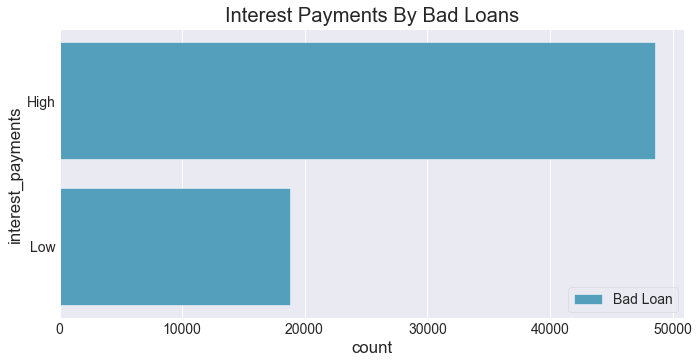

In [190]:
plt.figure(figsize=(10,5))
sns.countplot(data=bad_loan, y='interest_payments',hue='loan_condition', palette='GnBu_d')
plt.legend(loc='lower right')
plt.title('Interest Payments By Bad Loans')
plt.show()

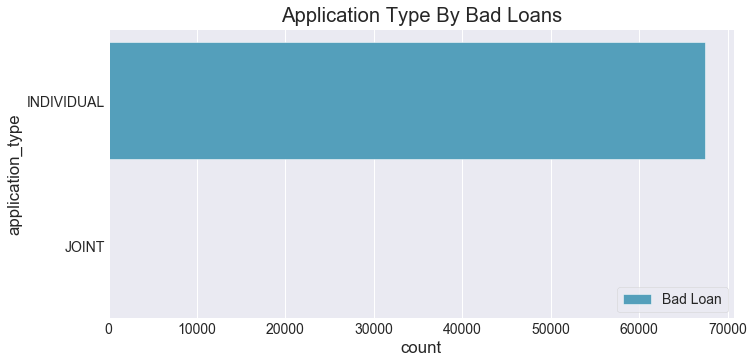

In [191]:
plt.figure(figsize=(10,5))
sns.countplot(data=bad_loan, y='application_type',hue='loan_condition', palette='GnBu_d')
plt.legend(loc='lower right')
plt.title('Application Type By Bad Loans')
plt.show()

In [192]:
bad_loan['application_type'].value_counts()

INDIVIDUAL    67424
JOINT             5
Name: application_type, dtype: int64

In [193]:
bad_loan[(bad_loan['application_type'] == 'JOINT') & (bad_loan['income_category'] == 'Low')]

id  year    issue_d  final_d  emp_length_int home_ownership  \
486081  67315886  2015 2015-01-12  1012016            6.05           RENT   
487235  67235299  2015 2015-01-12  1012016           10.00       MORTGAGE   
490469  66644712  2015 2015-01-12  1012016            2.00           RENT   
521995  65018933  2015 2015-01-11  1012016            5.00       MORTGAGE   
548211  63179629  2015 2015-01-10  1122015            6.00       MORTGAGE   

        home_ownership_cat income_category  annual_inc  income_cat  \
486081                   1             Low       17200           1   
487235                   3             Low       32000           1   
490469                   1             Low       80000           1   
521995                   3             Low       57800           1   
548211                   3             Low       53000           1   

        loan_amount        term  term_cat application_type  \
486081         5000   36 months         1            JOINT   
487235        26050   60 months         2            JOINT   
490469        27200   60 months         2            JOINT   
521995        24000   60 months         2            JOINT   
548211        30000   60 months         2            JOINT   

        application_type_cat             purpose  purpose_cat  \
486081                     2            vacation           11   
487235                     2  debt_consolidation            6   
490469                     2               other            4   
521995                     2  debt_consolidation            6   
548211                     2  debt_consolidation            6   

       interest_payments  interest_payment_cat loan_condition  \
486081               Low                     1       Bad Loan   
487235              High                     2       Bad Loan   
490469              High                     2       Bad Loan   
521995              High                     2       Bad Loan   
548211              High                     2       Bad Loan   

        loan_condition_cat  interest_rate grade  grade_cat    dti  \
486081                   1          11.99     C          3  59.18   
487235                   1          22.99     F          6  59.26   
490469                   1          24.99     F          6  32.52   
521995                   1          13.67     C          3  20.10   
548211                   1          17.86     D          4  30.97   

        total_pymnt  total_rec_prncp  recoveries  installment        region  
486081         0.00             0.00         0.0       166.05  Northern-Irl  
487235         0.00             0.00         0.0       734.22      leinster  
490469         0.00             0.00         0.0       798.20        ulster  
521995         0.00             0.00         0.0       554.35       munster  
548211       699.99           313.02         0.0       759.52      cannught

In [194]:
bad_loan['annual_inc'].min()

2000

In [195]:
bad_loan[bad_loan['annual_inc'] == 2000]

id  year    issue_d  final_d  emp_length_int home_ownership  \
42362  139940  2007 2007-01-10  1022008             0.5           RENT   

       home_ownership_cat income_category  annual_inc  income_cat  \
42362                   1             Low        2000           1   

       loan_amount        term  term_cat application_type  \
42362          500   36 months         1       INDIVIDUAL   

       application_type_cat purpose  purpose_cat interest_payments  \
42362                     1   other            4               Low   

       interest_payment_cat loan_condition  loan_condition_cat  interest_rate  \
42362                     1       Bad Loan                   1           9.01   

      grade  grade_cat  dti  total_pymnt  total_rec_prncp  recoveries  \
42362     B          2  0.0        83.88            49.04        20.4   

       installment    region  
42362        15.91  leinster

In [196]:
bad_loan['annual_inc'].max()

8900060

In [197]:
bad_loan[bad_loan['annual_inc'] == 8900060]

id  year    issue_d  final_d  emp_length_int home_ownership  \
684000  55140826  2015 2015-01-07  1012016            10.0           RENT   

        home_ownership_cat income_category  annual_inc  income_cat  \
684000                   1            High     8900060           3   

        loan_amount        term  term_cat application_type  \
684000        10550   36 months         1       INDIVIDUAL   

        application_type_cat             purpose  purpose_cat  \
684000                     1  debt_consolidation            6   

       interest_payments  interest_payment_cat loan_condition  \
684000              High                     2       Bad Loan   

        loan_condition_cat  interest_rate grade  grade_cat   dti  total_pymnt  \
684000                   1          15.61     D          4  0.09       1826.1   

        total_rec_prncp  recoveries  installment    region  
684000          1188.74         0.0       368.88  leinster

In [198]:
bad_loan['loan_amount'].max()

35000

In [199]:
bad_loan[bad_loan['loan_amount'] == 35000].describe()

id         year       final_d  emp_length_int  \
count  2.865000e+03  2865.000000  2.865000e+03     2865.000000   
mean   2.043444e+07  2013.611867  1.076102e+06        6.442182   
std    1.829018e+07     1.114342  3.736434e+04        3.519808   
min    6.324170e+05  2011.000000  1.012012e+06        0.500000   
25%    5.204744e+06  2013.000000  1.042015e+06        3.000000   
50%    1.298750e+07  2014.000000  1.082015e+06        7.000000   
75%    3.599916e+07  2014.000000  1.112014e+06       10.000000   
max    6.739670e+07  2015.000000  1.122015e+06       10.000000   

       home_ownership_cat    annual_inc   income_cat  loan_amount  \
count         2865.000000  2.865000e+03  2865.000000       2865.0   
mean             2.369983  1.326570e+05     1.707504      35000.0   
std              0.887888  7.583353e+04     0.625039          0.0   
min              1.000000  5.100000e+04     1.000000      35000.0   
25%              1.000000  9.300000e+04     1.000000      35000.0   
50%              3.000000  1.111110e+05     2.000000      35000.0   
75%              3.000000  1.500000e+05     2.000000      35000.0   
max              3.000000  1.650000e+06     3.000000      35000.0   

          term_cat  application_type_cat  purpose_cat  interest_payment_cat  \
count  2865.000000                2865.0  2865.000000           2865.000000   
mean      1.626178                   1.0     5.191623              1.888656   
std       0.483902                   0.0     2.104448              0.314612   
min       1.000000                   1.0     1.000000              1.000000   
25%       1.000000                   1.0     6.000000              2.000000   
50%       2.000000                   1.0     6.000000              2.000000   
75%       2.000000                   1.0     6.000000              2.000000   
max       2.000000                   1.0    13.000000              2.000000   

       loan_condition_cat  interest_rate    grade_cat          dti  \
count              2865.0    2865.000000  2865.000000  2865.000000   
mean                  1.0      18.463560     4.287958    17.336234   
std                   0.0       4.032669     1.299634     7.693702   
min                   1.0       6.000000     1.000000     0.030000   
25%                   1.0      15.610000     3.000000    11.760000   
50%                   1.0      18.490000     4.000000    16.890000   
75%                   1.0      21.490000     5.000000    22.520000   
max                   1.0      28.990000     7.000000    39.890000   

        total_pymnt  total_rec_prncp    recoveries  installment  
count   2865.000000      2865.000000   2865.000000  2865.000000  
mean   14444.483927      7046.224279   1505.847564  1038.343497  
std     9407.993389      6349.837774   2695.926626   165.128773  
min        0.000000         0.000000      0.000000   483.970000  
25%     7242.630000      2524.160000      0.000000   908.500000  
50%    12666.200000      5205.360000      0.000000   988.680000  
75%    19800.800000      9472.570000   3160.580000  1201.840000  
max    52943.000000     35000.000000  31900.520000  1424.570000

In [200]:
bad_loan['purpose'].value_counts()

debt_consolidation    41608
credit_card           11755
other                  4163
home_improvement       3553
small_business         1781
major_purchase         1294
medical                 804
moving                  607
car                     596
house                   417
vacation                402
wedding                 289
educational              88
renewable_energy         72
Name: purpose, dtype: int64

In [201]:
bad_loan[bad_loan['purpose'] == 'debt_consolidation'].describe(include='O')

home_ownership income_category        term application_type  \
count           41608           41608       41608            41608   
unique              5               3           2                2   
top              RENT             Low   36 months       INDIVIDUAL   
freq            19620           36523       25300            41605   

                   purpose interest_payments loan_condition  grade    region  
count                41608             41608          41608  41608     41608  
unique                   1                 2              1      7         5  
top     debt_consolidation              High       Bad Loan      C  leinster  
freq                 41608             30976          41608  12056     10353

In [202]:
bad_loan[bad_loan['purpose'] == 'debt_consolidation'].describe()

id          year       final_d  emp_length_int  \
count  4.160800e+04  41608.000000  4.160800e+04    41608.000000   
mean   1.789042e+07   2013.391896  1.075805e+06        5.948408   
std    1.716051e+07      1.298538  3.631147e+04        3.478429   
min    5.641300e+04   2007.000000  1.012009e+06        0.500000   
25%    3.727962e+06   2013.000000  1.042015e+06        3.000000   
50%    1.128594e+07   2014.000000  1.082014e+06        6.050000   
75%    2.982989e+07   2014.000000  1.112013e+06       10.000000   
max    6.799908e+07   2015.000000  1.122015e+06       10.000000   

       home_ownership_cat    annual_inc    income_cat   loan_amount  \
count        41608.000000  4.160800e+04  41608.000000  41608.000000   
mean             1.971928  6.671951e+04      1.131802  15549.902062   
std              0.956793  5.958744e+04      0.365530   8296.930846   
min              1.000000  4.080000e+03      1.000000    700.000000   
25%              1.000000  4.200000e+04      1.000000   9600.000000   
50%              2.000000  5.825000e+04      1.000000  14400.000000   
75%              3.000000  8.000000e+04      1.000000  20000.000000   
max              5.000000  8.900060e+06      3.000000  35000.000000   

           term_cat  application_type_cat  purpose_cat  interest_payment_cat  \
count  41608.000000          41608.000000      41608.0          41608.000000   
mean       1.391944              1.000072          6.0              1.744472   
std        0.488190              0.008491          0.0              0.436163   
min        1.000000              1.000000          6.0              1.000000   
25%        1.000000              1.000000          6.0              1.000000   
50%        1.000000              1.000000          6.0              2.000000   
75%        2.000000              1.000000          6.0              2.000000   
max        2.000000              2.000000          6.0              2.000000   

       loan_condition_cat  interest_rate     grade_cat           dti  \
count             41608.0   41608.000000  41608.000000  41608.000000   
mean                  1.0      16.133283      3.539536     19.512294   
std                   0.0       4.211632      1.344472      7.908723   
min                   1.0       5.320000      1.000000      0.000000   
25%                   1.0      13.110000      3.000000     13.720000   
50%                   1.0      15.800000      3.000000     19.400000   
75%                   1.0      18.920000      4.000000     25.140000   
max                   1.0      28.990000      7.000000     59.260000   

        total_pymnt  total_rec_prncp    recoveries   installment  
count  41608.000000     41608.000000  41608.000000  41608.000000  
mean    6674.457734      3642.092428    626.725177    467.597643  
std     5745.269733      3607.007671   1405.523229    243.431937  
min        0.000000         0.000000      0.000000     21.620000  
25%     2630.895000      1233.627500      0.000000    292.982500  
50%     5045.050000      2539.995000      0.000000    419.245000  
75%     8987.370000      4841.222500    659.897500    597.780000  
max    52943.000000     35000.000000  33520.270000   1424.570000

In [203]:
bad_loan[(bad_loan['purpose'] == 'debt_consolidation') & (bad_loan['income_category'] == 'Low')]

id  year    issue_d  final_d  emp_length_int home_ownership  \
12       1064687  2011 2011-01-12  1072012            0.50           RENT   
26       1069800  2011 2011-01-12  1012016            9.00           RENT   
46       1069465  2011 2011-01-12  1082014           10.00       MORTGAGE   
50       1069248  2011 2011-01-12  1102014            8.00       MORTGAGE   
55       1069410  2011 2011-01-12  1102014            7.00           RENT   
...          ...   ...        ...      ...             ...            ...   
887290  37167534  2015 2015-01-01  1042015            8.00       MORTGAGE   
887303  37087435  2015 2015-01-01  1082015            9.00           RENT   
887308  37227443  2015 2015-01-01  1072015            6.05       MORTGAGE   
887322  37317288  2015 2015-01-01  1102015            2.00           RENT   
887371  36260758  2015 2015-01-01  1082015            6.05            OWN   

        home_ownership_cat income_category  annual_inc  income_cat  \
12                       1             Low       30000           1   
26                       1             Low       60000           1   
46                       3             Low      100000           1   
50                       3             Low       80000           1   
55                       1             Low       50000           1   
...                    ...             ...         ...         ...   
887290                   3             Low       98000           1   
887303                   1             Low       42000           1   
887308                   3             Low       47784           1   
887322                   1             Low       35000           1   
887371                   2             Low       32000           1   

        loan_amount        term  term_cat application_type  \
12             9000   36 months         1       INDIVIDUAL   
26            15000   36 months         1       INDIVIDUAL   
46             5000   36 months         1       INDIVIDUAL   
50            15000   36 months         1       INDIVIDUAL   
55            21000   60 months         2       INDIVIDUAL   
...             ...         ...       ...              ...   
887290        35000   60 months         2       INDIVIDUAL   
887303        12000   36 months         1       INDIVIDUAL   
887308         2725   36 months         1       INDIVIDUAL   
887322        10000   60 months         2       INDIVIDUAL   
887371        10850   36 months         1       INDIVIDUAL   

        application_type_cat             purpose  purpose_cat  \
12                         1  debt_consolidation            6   
26                         1  debt_consolidation            6   
46                         1  debt_consolidation            6   
50                         1  debt_consolidation            6   
55                         1  debt_consolidation            6   
...                      ...                 ...          ...   
887290                     1  debt_consolidation            6   
887303                     1  debt_consolidation            6   
887308                     1  debt_consolidation            6   
887322                     1  debt_consolidation            6   
887371                     1  debt_consolidation            6   

       interest_payments  interest_payment_cat loan_condition  \
12                  High                     2       Bad Loan   
26                  High                     2       Bad Loan   
46                   Low                     1       Bad Loan   
50                   Low                     1       Bad Loan   
55                  High                     2       Bad Loan   
...                  ...                   ...            ...   
887290              High                     2       Bad Loan   
887303              High                     2       Bad Loan   
887308              High                     2       Bad Loan   
887322              High                     2       Bad Loan   
887371 

In [204]:
bad_loan[bad_loan['purpose'] == 'renewable_energy']['income_category'].value_counts()

Low       65
Medium     6
High       1
Name: income_category, dtype: int64

In [205]:
bad_loan[(bad_loan['income_category'] == 'High') & (bad_loan['purpose'] == 'renewable_energy')]

id  year    issue_d  final_d  emp_length_int home_ownership  \
25556  584264  2010 2010-01-09  1052011            10.0           RENT   

       home_ownership_cat income_category  annual_inc  income_cat  \
25556                   1            High      203000           3   

       loan_amount        term  term_cat application_type  \
25556        25000   36 months         1       INDIVIDUAL   

       application_type_cat           purpose  purpose_cat interest_payments  \
25556                     1  renewable_energy           13              High   

       interest_payment_cat loan_condition  loan_condition_cat  interest_rate  \
25556                     2       Bad Loan                   1          21.64   

      grade  grade_cat    dti  total_pymnt  total_rec_prncp  recoveries  \
25556     G          7  20.74     14687.91          2729.59     8987.85   

       installment        region  
25556       950.12  Northern-Irl

In [206]:
bad_loan[(bad_loan['income_category'] == 'Medium') & (bad_loan['purpose'] == 'renewable_energy')]

id  year    issue_d  final_d  emp_length_int home_ownership  \
14316     768335  2011 2011-01-05  1092011            1.00       MORTGAGE   
39791     640893  2010 2010-01-12  1022013            7.00       MORTGAGE   
211850   1368587  2012 2012-01-07  1032013            8.00           RENT   
310139  26489120  2014 2014-01-09  1122015           10.00           RENT   
354607  20050555  2014 2014-01-07  1042015            6.00       MORTGAGE   
677821  55512444  2015 2015-01-08  1092015            6.05       MORTGAGE   

        home_ownership_cat income_category  annual_inc  income_cat  \
14316                    3          Medium      110000           2   
39791                    3          Medium      160000           2   
211850                   1          Medium      125000           2   
310139                   1          Medium      120000           2   
354607                   3          Medium      148000           2   
677821                   3          Medium      160000           2   

        loan_amount        term  term_cat application_type  \
14316         16000   36 months         1       INDIVIDUAL   
39791          5000   36 months         1       INDIVIDUAL   
211850        31800   36 months         1       INDIVIDUAL   
310139        20000   36 months         1       INDIVIDUAL   
354607        27000   60 months         2       INDIVIDUAL   
677821        35000   60 months         2       INDIVIDUAL   

        application_type_cat           purpose  purpose_cat interest_payments  \
14316                      1  renewable_energy           13              High   
39791                      1  renewable_energy           13              High   
211850                     1  renewable_energy           13              High   
310139                     1  renewable_energy           13               Low   
354607                     1  renewable_energy           13              High   
677821                     1  renewable_energy           13              High   

        interest_payment_cat loan_condition  loan_condition_cat  \
14316                      2       Bad Loan                   1   
39791                      2       Bad Loan                   1   
211850                     2       Bad Loan                   1   
310139                     1       Bad Loan                   1   
354607                     2       Bad Loan                   1   
677821                     2       Bad Loan                   1   

        interest_rate grade  grade_cat    dti  total_pymnt  total_rec_prncp  \
14316           14.79     C          3  23.78      4514.49          1075.12   
39791           15.57     D          4  15.77      4360.25          3213.83   
211850          21.97     E          5  17.89     11223.83          5386.88   
310139          12.49     B          2  12.83     10034.70          7439.25   
354607          26.06     G          7  17.57     13079.19          2190.57   
677821          20.99     E          5  32.63       905.87           334.47   

        recoveries  installment        region  
14316      2857.13       553.01      cannught  
39791         0.00       174.73  Northern-Irl  
211850     1517.91      1213.97        ulster  
310139        0.00       668.98        ulster  
354607     5794.95       809.36      leinster  
677821        0.00       946.68      cannught

In [207]:
bad_loan['region'].value_counts()

leinster        16679
ulster          16432
Northern-Irl    16133
cannught        10778
munster          7407
Name: region, dtype: int64

In [208]:
bad_loan['grade'].value_counts()

C    19054
D    15859
B    13456
E     9745
F     4383
A     3663
G     1269
Name: grade, dtype: int64

In [209]:
bad_loan[bad_loan['grade'] == 'A'].describe(include='O')

home_ownership income_category        term application_type  \
count            3663            3663        3663             3663   
unique              4               3           2                1   
top          MORTGAGE             Low   36 months       INDIVIDUAL   
freq             1895            3021        3546             3663   

                   purpose interest_payments loan_condition grade  \
count                 3663              3663           3663  3663   
unique                  14                 1              1     1   
top     debt_consolidation               Low       Bad Loan     A   
freq                  1837              3663           3663  3663   

              region  
count           3663  
unique             5  
top     Northern-Irl  
freq             924

In [210]:
bad_loan[(bad_loan['grade'] == 'A') & (bad_loan['purpose'] == 'renewable_energy')]

id  year    issue_d  final_d  emp_length_int home_ownership  \
4546    1001365  2011 2011-01-10  1062013             3.0       MORTGAGE   
7962     873954  2011 2011-01-09  1082013             3.0           RENT   
16928    724550  2011 2011-01-04  1072011             1.0           RENT   
24371    602190  2010 2010-01-10  1102013            10.0            OWN   
26223    564234  2010 2010-01-09  1012013            10.0           RENT   
197804  1532812  2012 2012-01-09  1032014             2.0       MORTGAGE   
217693  1278802  2012 2012-01-05  1122013             7.0           RENT   
230223  1055470  2012 2012-01-01  1062013             3.0           RENT   

        home_ownership_cat income_category  annual_inc  income_cat  \
4546                     3             Low       88000           1   
7962                     1             Low       70000           1   
16928                    1             Low       36000           1   
24371                    2             Low       70000           1   
26223                    1             Low       79000           1   
197804                   3             Low       80429           1   
217693                   1             Low       35396           1   
230223                   1             Low       52000           1   

        loan_amount        term  term_cat application_type  \
4546           2700   36 months         1       INDIVIDUAL   
7962           3600   36 months         1       INDIVIDUAL   
16928          8400   36 months         1       INDIVIDUAL   
24371          6000   60 months         2       INDIVIDUAL   
26223         15000   36 months         1       INDIVIDUAL   
197804        11875   36 months         1       INDIVIDUAL   
217693         3000   36 months         1       INDIVIDUAL   
230223         7500   36 months         1       INDIVIDUAL   

        application_type_cat           purpose  purpose_cat interest_payments  \
4546                       1  renewable_energy           13               Low   
7962                       1  renewable_energy           13               Low   
16928                      1  renewable_energy           13               Low   
24371                      1  renewable_energy           13               Low   
26223                      1  renewable_energy           13               Low   
197804                     1  renewable_energy           13               Low   
217693                     1  renewable_energy           13               Low   
230223                     1  renewable_energy           13               Low   

        interest_payment_cat loan_condition  loan_condition_cat  \
4546                       1       Bad Loan                   1   
7962                       1       Bad Loan                   1   
16928                      1       Bad Loan                   1   
24371                      1       Bad Loan                   1   
26223                      1       Bad Loan                   1   
197804                     1       Bad Loan                   1   
217693                     1       Bad Loan                   1   
230223                     1       Bad Loan                   1   

        interest_rate grade  grade_cat    dti  total_pymnt  total_rec_prncp  \
4546             7.90     A          1  26.82      1709.51          1338.99   
7962             7.49     A          1  10.77      3128.53          2195.57   
16928            6.92     A          1  13.30      6883.03           421.87   
24371            6.54     A          1   0.43      4379.29          3152.38   
26223            7.51     A          1   8.95     12830.70         10909.54   
197804           6.03     A          1  13.18      6502.17          5666.88   
217693           8.90     A          1  12.34      2014.08          1478.19   
230223           6.03     A          1  18.51      3878.21          3371.41   

        recoveries  installment        region  
4546         90.71        84.49  Northern-Ir

In [211]:
bad_loan[(bad_loan['grade'] == 'A') & (bad_loan['term'] == ' 60 months')].shape

(117, 30)

In [212]:
bad_loan[(bad_loan['grade'] == 'A') & (bad_loan['term'] == ' 36 months')].shape

(3546, 30)

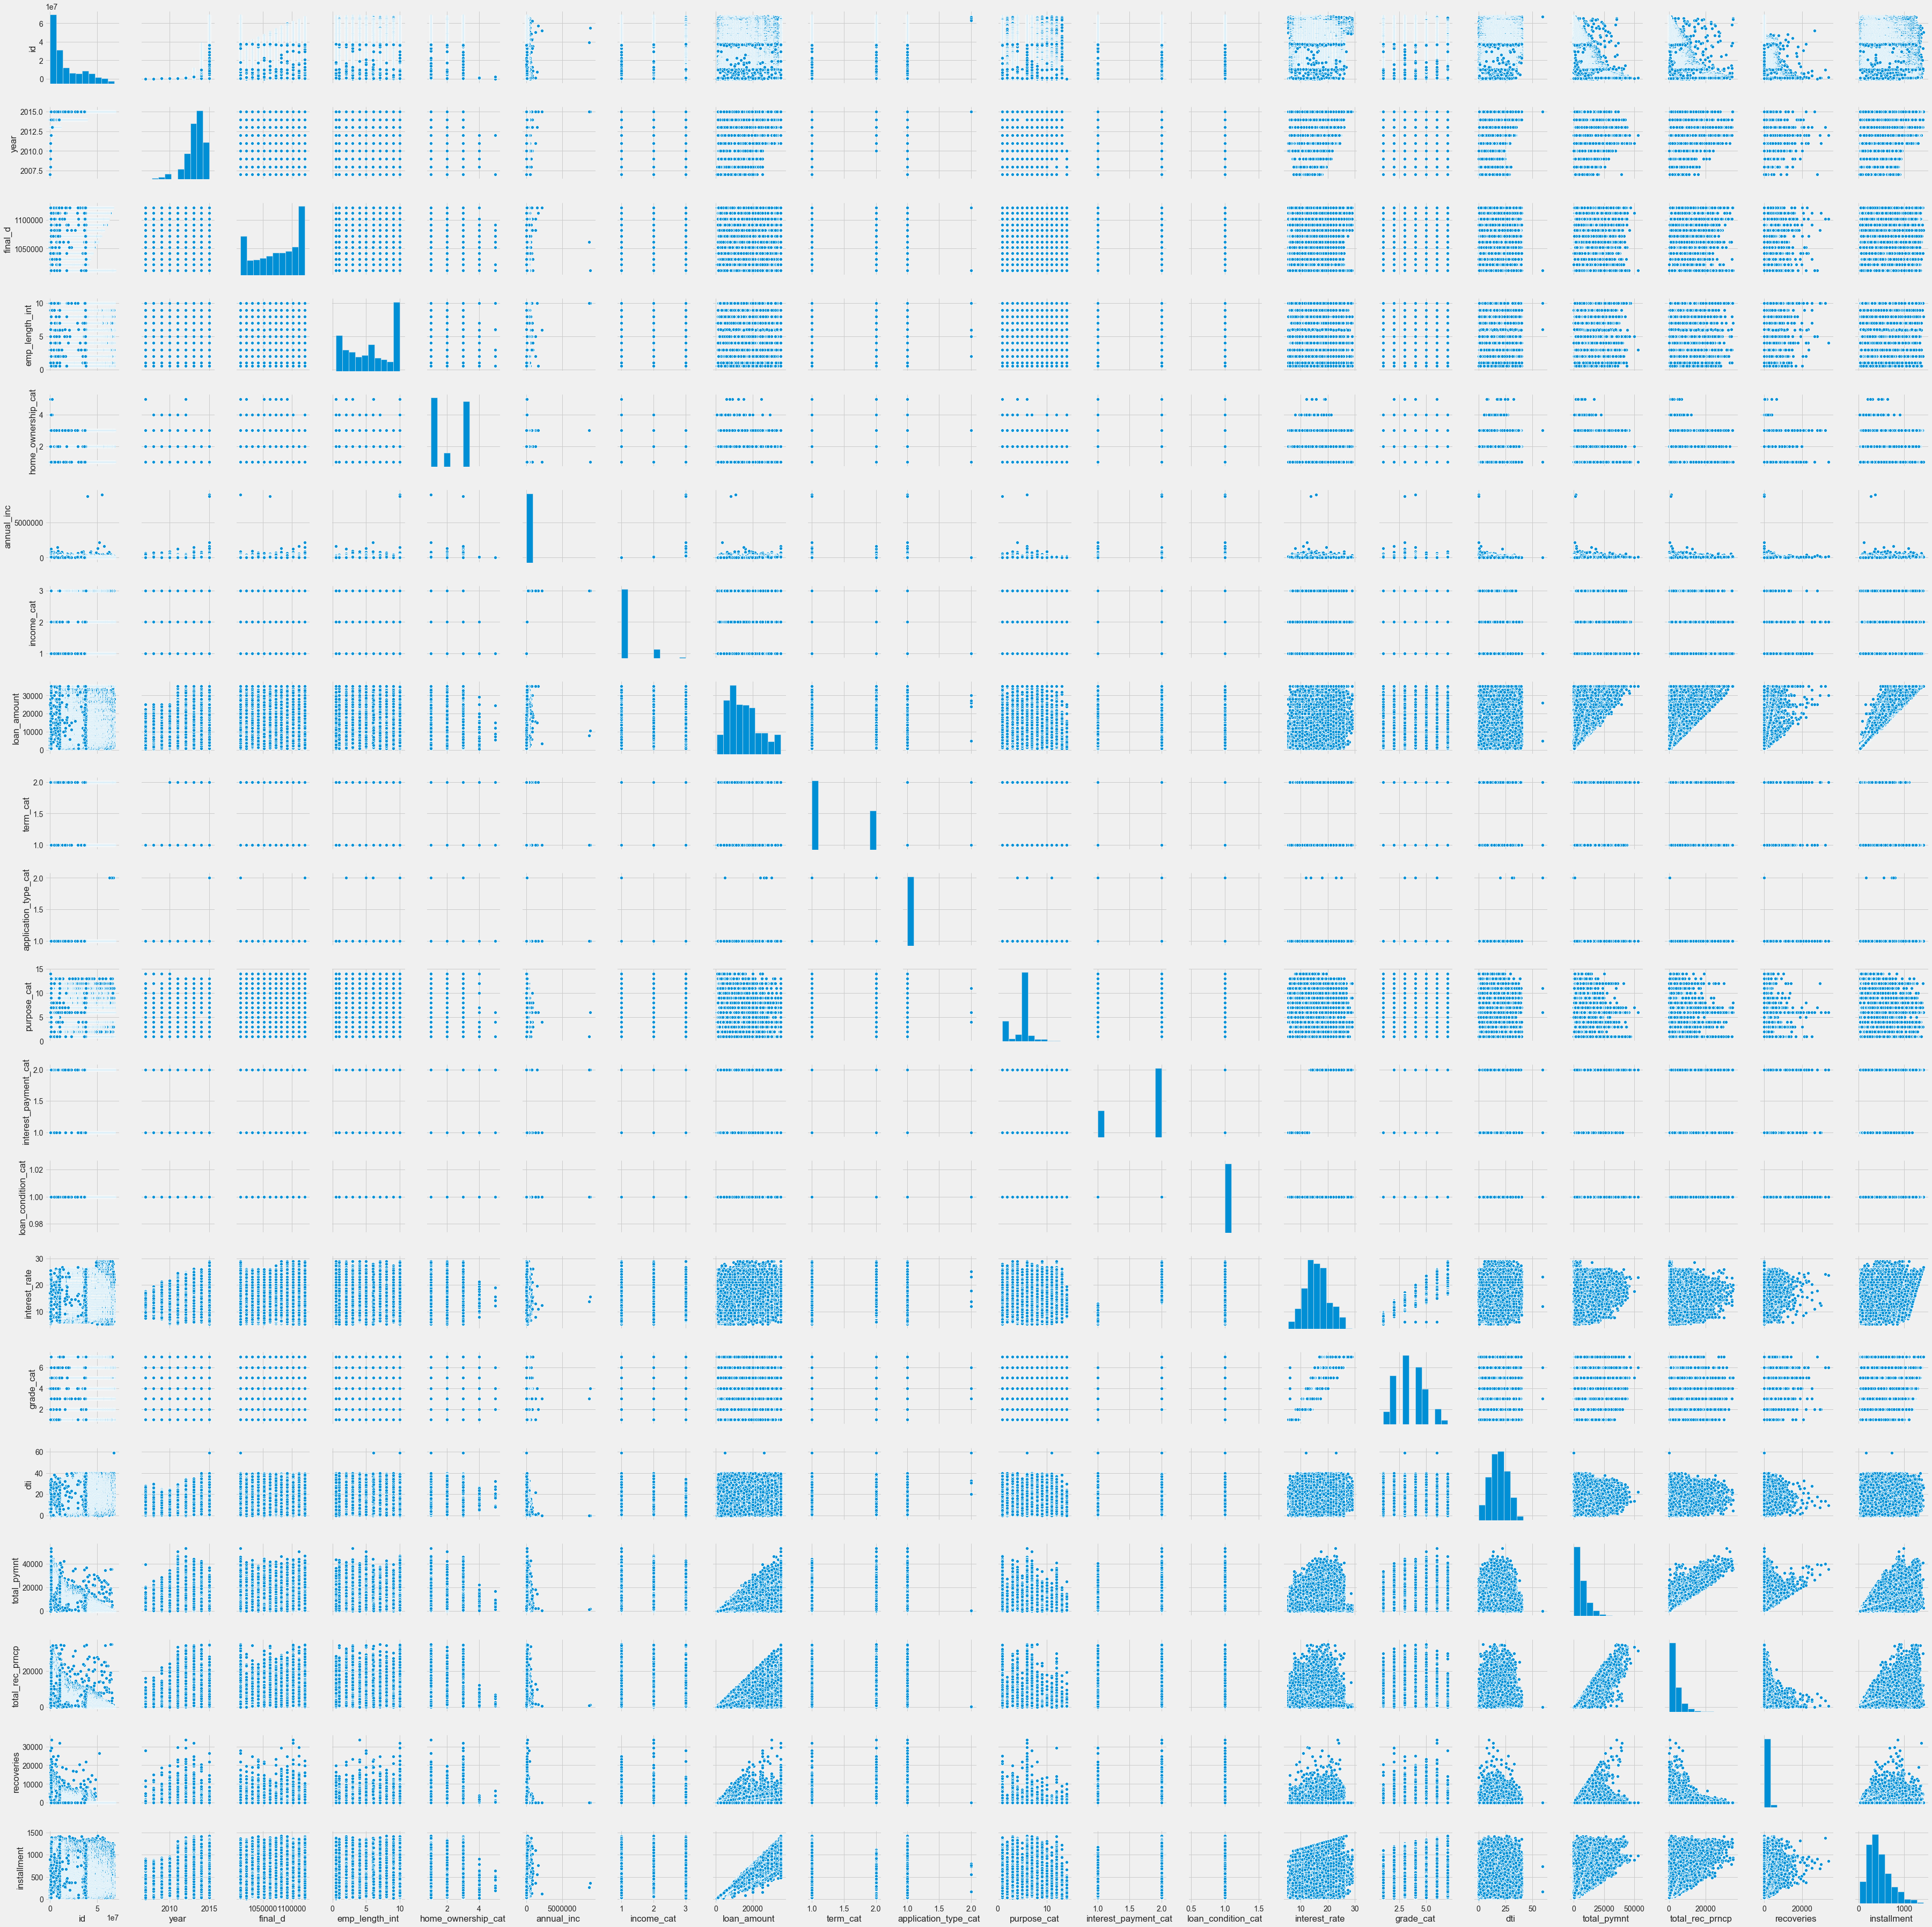

In [230]:
sns.pairplot(bad_loan)

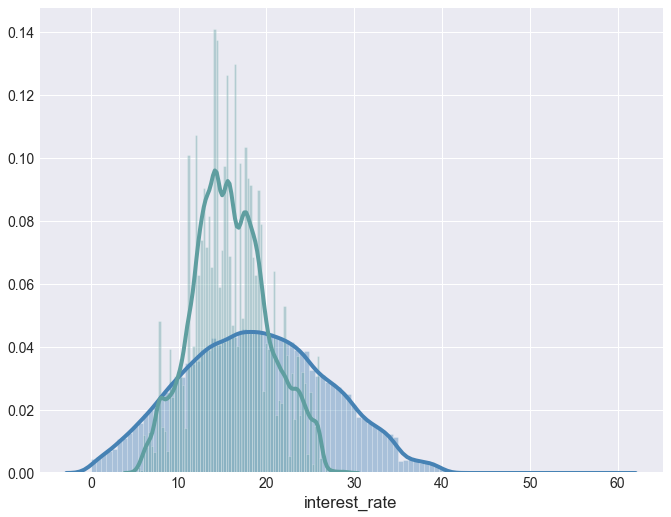

In [213]:
plt.figure(figsize=(10,8))
sns.distplot(bad_loan['dti'],color='steelblue',bins=100)
sns.distplot(bad_loan['interest_rate'],color='cadetblue',bins=80)
plt.show()

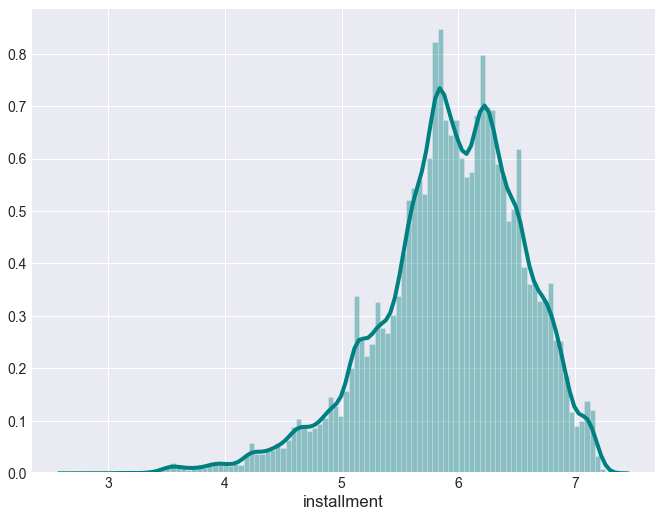

In [214]:
plt.figure(figsize=(10,8))
sns.distplot(np.log(bad_loan['installment']),color='teal',bins=100)

>### Feature Engineering
Train test split

In [215]:
# plt.style.use('fivethirtyeight')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 30 columns):
id                      887379 non-null int64
year                    887379 non-null int64
issue_d                 887379 non-null datetime64[ns]
final_d                 887379 non-null int64
emp_length_int          887379 non-null float64
home_ownership          887379 non-null object
home_ownership_cat      887379 non-null int64
income_category         887379 non-null object
annual_inc              887379 non-null int64
income_cat              887379 non-null int64
loan_amount             887379 non-null int64
term                    887379 non-null object
term_cat                887379 non-null int64
application_type        887379 non-null object
application_type_cat    887379 non-null int64
purpose                 887379 non-null object
purpose_cat             887379 non-null int64
interest_payments       887379 non-null object
interest_payment_cat    887379 non-null int6

In [216]:
X = df.drop(['loan_condition','loan_condition_cat','year','issue_d','final_d','home_ownership','income_category','term','application_type','purpose',
            'interest_payments','loan_condition','grade','region'],axis=1)
y = df['loan_condition_cat']

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [218]:
X_train

id  emp_length_int  home_ownership_cat  annual_inc  income_cat  \
437476  12385210            10.0                   2       72000           1   
202987   1473242             7.0                   3       60000           1   
609482  60266321             4.0                   3      140000           2   
447820  11455275            10.0                   1       60000           1   
421422  13048633             6.0                   1       64000           1   
...          ...             ...                 ...         ...         ...   
661055  56030114             6.0                   3      118000           2   
204614   1455243            10.0                   3       52000           1   
476497  67828536             0.5                   1      130000           2   
214539   1332621             1.0                   1       56000           1   
176991   2825062            10.0                   3       93000           1   

        loan_amount  term_cat  application_type_cat  purpose_cat  \
437476        10000         1                     1            6   
202987        10000         1                     1            6   
609482        13000         1                     1            7   
447820        13000         1                     1            6   
421422         9500         1                     1            6   
...             ...       ...                   ...          ...   
661055        20000         2                     1            6   
204614        18200         2                     1            1   
476497        12000         1                     1           11   
214539         6000         1                     1            1   
176991        35000         2                     1            6   

        interest_payment_cat  interest_rate  grade_cat    dti  total_pymnt  \
437476                     1          12.99          2  15.07   7411.80000   
202987                     1          12.12          2   7.76  11641.16947   
609482                     1           8.18          2   9.95   1638.42000   
447820                     1          10.99          2  32.22   5978.98000   
421422                     1          12.99          2  13.28  10104.78379   
...                      ...            ...        ...    ...          ...   
661055                     2          18.25          5  12.62   2512.44000   
204614                     2          19.72          4  24.31  19631.44000   
476497                     1           9.76          2  13.63      0.00000   
214539                     1          13.11          2  21.69   6857.74000   
176991                     2          17.77          4  22.60  49245.66997   

        total_rec_prncp  recoveries  installment  
437476          5645.53         0.0       336.90  
202987         10000.00         0.0       332.72  
609482          1292.51         0.0       408.46  
447820          4552.78         0.0       425.55  
421422          9500.00         0.0       320.05  
...                 ...         ...          ...  
661055          1064.04         0.0       510.60  
204614         10421.67         0.0       479.36  
476497             0.00         0.0       385.86  
214539          6000.00         0.0       202.49  
176991         35000.00         0.0       884.40  

[709903 rows x 17 columns]

>### Smote

In [219]:
sm = SMOTE()
oversampledX_train, oversampledy_train = sm.fit_sample(X_train, y_train)

>### Logistic Regression

In [37]:
modelog = LogisticRegression()
modelog.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_train.value_counts(normalize=True)

0    0.924022
1    0.075978
Name: loan_condition_cat, dtype: float64

- Data is extremly imbalance (0=Good loan, 1=Bad loan)

In [39]:
predict_proba = modelog.predict_proba(X_test)
predict_proba

array([[0.79033431, 0.20966569],
       [0.99254182, 0.00745818],
       [0.98820377, 0.01179623],
       ...,
       [0.97834624, 0.02165376],
       [0.99002828, 0.00997172],
       [0.98782436, 0.01217564]])

Text(0.5, 0, 'FPR')

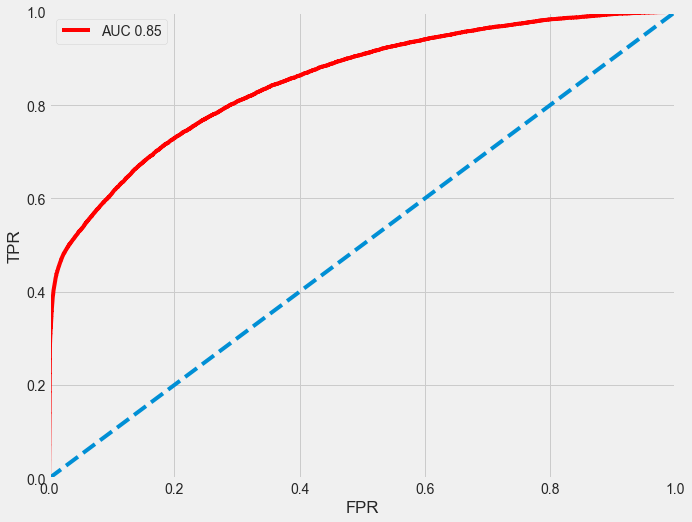

In [40]:
Prediction_AUC = predict_proba[:,1]
FPR, TPR, thresholds = roc_curve(y_test, Prediction_AUC)
roc_auc = auc(FPR,TPR)
plt.figure(figsize=(10,8))
plt.plot(FPR,TPR, label =f'AUC {round(roc_auc,2)}', color='red')
plt.plot([0,1],[0,1], linestyle='dashed')
plt.legend(loc='upper left')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')

In [41]:
predictlog = modelog.predict(X_test)

In [42]:
print(classification_report(y_test,predictlog))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    163984
           1       0.94      0.21      0.34     13492

    accuracy                           0.94    177476
   macro avg       0.94      0.60      0.65    177476
weighted avg       0.94      0.94      0.92    177476



Dari hasil saya simpulkan karena recall 1 adalah bad loan 21% sisanya 89% prediksi bisa mengakibatkan  prediksi bad loan menjadi good loan

train_scores:

[[0.91172584 0.92370778 0.95025229 0.9351657  0.92912543]
 [0.93343085 0.93391542 0.93515503 0.95358686 0.9311973 ]
 [0.93962177 0.94004436 0.94573341 0.95197464 0.93838592]
 [0.93928505 0.93539559 0.94584048 0.93848977 0.94600146]
 [0.9348249  0.9413117  0.93930579 0.93783658 0.9494762 ]]
test_scores:

[[0.95646172 0.95540242 0.94734499 0.94795916 0.92783772]
 [0.95473191 0.95533481 0.93992991 0.94912552 0.92791661]
 [0.95331763 0.95443328 0.94322613 0.94366562 0.92730244]
 [0.95481079 0.94420091 0.94253307 0.93514616 0.92707705]
 [0.94904663 0.95341905 0.93955239 0.93364737 0.92633892]]
[0.92999541 0.93745709 0.94315202 0.94100247 0.94055103]
[354951 443689 532427 621165 709903]


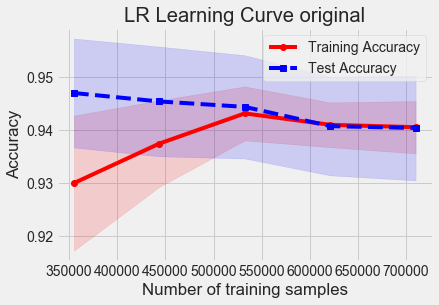

In [43]:
train_sizes, train_scores, test_scores = learning_curve(estimator=modelog,
                                                       X=X,
                                                       y=y,
                                                       train_sizes=np.linspace(0.5, 1.0, 5),
                                                       cv=5)

print('train_scores:\n')
print(train_scores)
print('test_scores:\n')
print(test_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print(train_mean)
print(train_sizes)
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('LR Learning Curve original')
plt.legend()
plt.show()

In [44]:
searchlog = GridSearchCV(estimator = modelog,
                      param_grid = {
                          'penalty': ['l1', 'l2'],
                          'C': [0.0001,0.001, 0.01, 0.1, 1],
                          'max_iter' : [100,200,500]
                      }, scoring = 'accuracy',
                      cv = 5,
                      n_jobs = -1)
searchlog.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [45]:
print(searchlog.best_params_)
print('\n')
print(searchlog.best_score_)

{'C': 0.1, 'max_iter': 200, 'penalty': 'l2'}


0.9463334993807202


In [46]:
print(classification_report(y_test, searchlog.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    163984
           1       0.94      0.21      0.34     13492

    accuracy                           0.94    177476
   macro avg       0.94      0.60      0.65    177476
weighted avg       0.94      0.94      0.92    177476



In [47]:
confusion_matrix(y_test,predictlog)

array([[163822,    162],
       [ 10723,   2769]], dtype=int64)

In [48]:
modelogover = LogisticRegression()
modelogover.fit(oversampledX_train,oversampledy_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
oversampledy_train.value_counts(normalize=True)

1    0.5
0    0.5
Name: loan_condition_cat, dtype: float64

In [50]:
predictlogover = modelogover.predict(X_test)

In [51]:
print(classification_report(y_test,predictlogover))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90    163984
           1       0.23      0.61      0.34     13492

    accuracy                           0.82    177476
   macro avg       0.60      0.72      0.62    177476
weighted avg       0.91      0.82      0.85    177476



train_scores:

[[       nan 0.9315074  0.93298804 0.92514845 0.94014543]
 [0.85541302 0.85671492 0.8991684  0.86454765 0.86106728]
 [0.7965021  0.79210527 0.79229456 0.7760564  0.79375424]
 [0.74371999 0.7703144  0.77041785 0.74252002 0.77032856]
 [0.76551839 0.76339938 0.76343177 0.73298906 0.73336351]]
test_scores:

[[       nan 0.64726911 0.65360957 0.60146502 0.60300092]
 [0.65687324 0.65372141 0.77351307 0.69595939 0.69034171]
 [0.72207083 0.72242527 0.71643685 0.69952284 0.72662413]
 [0.71542035 0.75048688 0.75062694 0.72205453 0.75018103]
 [0.75531943 0.76610884 0.76582973 0.73609491 0.73385775]]
[       nan 0.86738225 0.79014251 0.75946016 0.75174042]
[ 524772  655965  787158  918351 1049545]


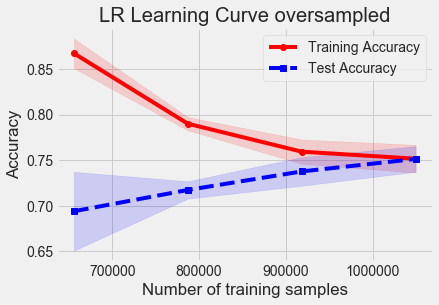

In [52]:
train_sizes, train_scores, test_scores = learning_curve(estimator=modelogover,
                                                       X=oversampledX_train,
                                                       y=oversampledy_train,
                                                       train_sizes=np.linspace(0.5, 1.0, 5),
                                                       cv=5)

print('train_scores:\n')
print(train_scores)
print('test_scores:\n')
print(test_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print(train_mean)
print(train_sizes)
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('LR Learning Curve oversampled')
plt.legend()
plt.show()

>### Random Forest

In [53]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
predictionrfc = rfc.predict(X_test)

In [55]:
print(classification_report(y_test,predictionrfc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    163984
           1       0.97      0.69      0.81     13492

    accuracy                           0.97    177476
   macro avg       0.97      0.84      0.90    177476
weighted avg       0.97      0.97      0.97    177476



In [56]:
searchrfc = GridSearchCV(estimator = rfc,
                      param_grid = {
                          'n_estimators': [10, 20, 30],
                          'bootstrap': [True, False],
                          'min_samples_split': [2, 4, 6, 8]
                      }, scoring = 'accuracy',
                      cv = 5,
                      n_jobs = -1)
searchrfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [57]:
print(searchrfc.best_params_)
print('\n')
print(searchrfc.best_score_)

{'bootstrap': False, 'min_samples_split': 6, 'n_estimators': 30}


0.9754600280678748


In [58]:
print(classification_report(y_test, searchrfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    163984
           1       0.96      0.71      0.82     13492

    accuracy                           0.98    177476
   macro avg       0.97      0.86      0.90    177476
weighted avg       0.98      0.98      0.97    177476



In [59]:
# train_sizes, train_scores, test_scores = learning_curve(estimator=searchrfc,
#                                                        X=X,
#                                                        y=y,
#                                                        train_sizes=np.linspace(0.5, 1.0, 5),
#                                                        cv=5)

# print('train_scores:\n')
# print(train_scores)
# print('test_scores:\n')
# print(test_scores)
# # Mean value of accuracy against training data
# train_mean = np.mean(train_scores, axis=1)
# print(train_mean)
# print(train_sizes)
# # Standard deviation of training accuracy per number of training samples
# train_std = np.std(train_scores, axis=1)

# # Same as above for test data
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

# # Plot training accuracies 
# plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# # Plot the variance of training accuracies
# plt.fill_between(train_sizes,
#                 train_mean + train_std,
#                 train_mean - train_std,
#                 alpha=0.15, color='red')

# # Plot for test data as training data
# plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
#         label='Test Accuracy')
# plt.fill_between(train_sizes,
#                 test_mean + test_std,
#                 test_mean - test_std,
#                 alpha=0.15, color='blue')

# plt.xlabel('Number of training samples')
# plt.ylabel('Accuracy')
# plt.title('RFC Learning Curve original')
# plt.legend()
# plt.show()

KeyboardInterrupt: 

In [60]:
rfcover = RandomForestClassifier()
rfcover.fit(oversampledX_train,oversampledy_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
predictoverrfc = rfcover.predict(X_test)

In [62]:
print(classification_report(y_test,predictoverrfc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    163984
           1       0.94      0.72      0.82     13492

    accuracy                           0.98    177476
   macro avg       0.96      0.86      0.90    177476
weighted avg       0.97      0.98      0.97    177476



In [63]:
searchrfcover = GridSearchCV(estimator = rfcover,
                      param_grid = {
                          'n_estimators': [10, 20, 30],
                          'bootstrap': [True, False],
                          'min_samples_split': [2, 4, 6, 8]
                      }, scoring = 'accuracy',
                      cv = 5,
                      n_jobs = -1)
searchrfcover.fit(oversampledX_train, oversampledy_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [64]:
print(searchrfcover.best_params_)
print('\n')
print(searchrfcover.best_score_)

{'bootstrap': False, 'min_samples_split': 4, 'n_estimators': 30}


0.9809060518244911


In [65]:
print(classification_report(y_test, searchrfcover.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    163984
           1       0.93      0.72      0.81     13492

    accuracy                           0.97    177476
   macro avg       0.96      0.86      0.90    177476
weighted avg       0.97      0.97      0.97    177476



In [70]:
rfcoverfeat = RandomForestClassifier(random_state=101)
rfcoverfeat.fit(oversampledX_train,oversampledy_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

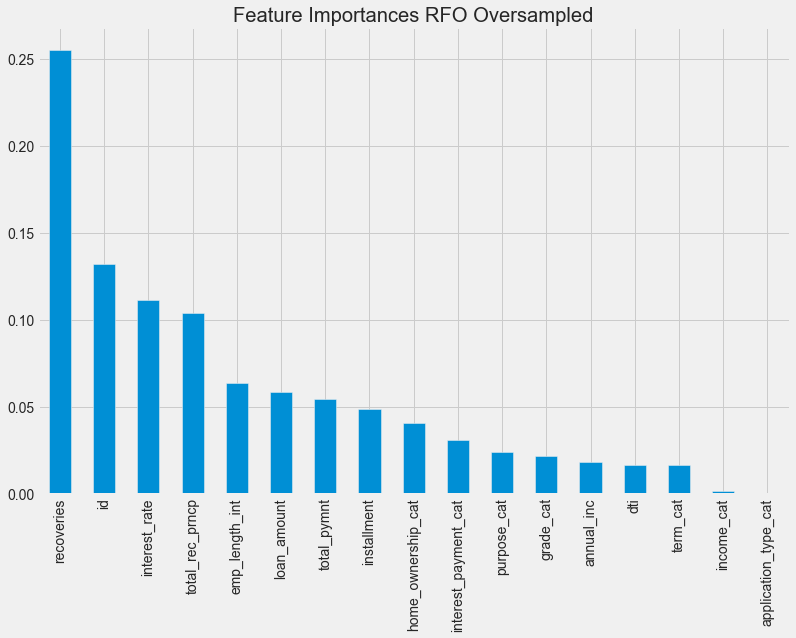

In [71]:
plt.figure(figsize=(12,8))
coef = pd.Series(rfcoverfeat.feature_importances_, X_train.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importances RFO Oversampled')